In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
pd.set_option('display.max_columns',None)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Thirumala.csv', encoding='latin-1', date_parser=True)

In [3]:
df.head()

,S.No,User,Book.Date,Book Type,CD.No,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,GST %,GST-VAL,Amount,Remarks,CODE,Consignor,Consignee
0,1,ARVIND,01-Jul-22,CREDIT,302096,BLR,CJB,2,27.0,27.0,6.0,162.0,0,0,0,0,0,0,0.0,162.0,18,29.16,191.16,NaN,1028,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
1,2,ARVIND,01-Jul-22,CREDIT,305567,BLR,CJB,10,238.0,238.0,5.0,1190.0,0,0,0,0,0,0,0.0,1190.0,18,214.20,1404.20,NaN,1024,SHREE ANJANI COURIER SERVICE PVT. LTD,SHREE ANJANI COURIER SERVICE PVT. LTD
2,3,ARVIND,01-Jul-22,CREDIT,347317,BLR,CJB,28,416.0,416.0,6.0,2496.0,0,0,0,0,0,0,0.0,2496.0,18,449.28,2945.28,NaN,1028,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
3,4,ARVIND,01-Jul-22,CREDIT,347413,BLR,CJB,3,38.0,38.0,6.0,228.0,0,0,0,0,0,0,0.0,228.0,18,41.04,269.04,NaN,1026,SHREE NANDAN COURIER LIMITED,SHREE NANDAN COURIER LIMITED
4,5,ARVIND,01-Jul-22,CREDIT,349130,BLR,CJB,1,12.0,12.0,9.5,114.0,0,0,0,0,0,0,0.0,114.0,18,20.52,134.52,NaN,1005,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101170 entries, 0 to 101169
Data columns (total 27 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   S.No       101170 non-null  int64  
 1   User       101170 non-null  object 
 2   Book.Date  101170 non-null  object 
 3   Book Type  101170 non-null  object 
 4   CD.No      101170 non-null  object 
 5   ORG        101170 non-null  object 
 6   DEST       101170 non-null  object 
 7   Pcs        101170 non-null  int64  
 8   A.Wgt      101170 non-null  float64
 9   C.Wgt      101170 non-null  float64
 10  Rate       101170 non-null  float64
 11  FRT-AMT    101170 non-null  float64
 12  FOD        101170 non-null  int64  
 13  RISK       101170 non-null  int64  
 14  LR         101170 non-null  int64  
 15  COD        101170 non-null  int64  
 16  DOD        101170 non-null  int64  
 17  HAND       101170 non-null  int64  
 18  OTH        101170 non-null  float64
 19  GTOT       101170 non-n

In [5]:
df[df.duplicated(subset='CD.No') == True].head()

,S.No,User,Book.Date,Book Type,CD.No,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,GST %,GST-VAL,Amount,Remarks,CODE,Consignor,Consignee
13405,13406,DEVI,25-Jul-22,CREDIT,282406,TVL,MAA,3,36.0,36.0,3.0,108.0,0,0,0,0,0,0,0.0,108.0,18,19.44,127.44,NaN,C1190,C1190-GMS WORLDWIDE EXPRESS PVT LTD,C1190-GMS WORLDWIDE EXPRESS PVT LTD
17076,17077,BLESSY,01-Aug-22,CASH,414191,IXM,ERD,8,20.0,20.0,5.0,100.0,0,0,0,0,0,0,0.0,100.0,18,0.00,100.00,NaN,99999,TEAM,SELF
33419,33420,KARTHI,01-Sep-22,CREDIT,292405,KCH,MAA,1,4.0,4.0,3.0,12.0,0,0,0,0,0,0,0.0,12.0,18,2.16,14.16,NaN,C1190,C1190-GMS WORLDWIDE EXPRESS PVT LTD,C1190-GMS WORLDWIDE EXPRESS PVT LTD
34341,34342,BLESSY,02-Sep-22,CASH,391574,TRP,CJB,4,45.0,45.0,5.0,225.0,0,0,0,0,0,0,0.0,225.0,18,0.00,225.00,POD,99999,MAHINDRA,BLUE WINGS
34344,34345,BLESSY,02-Sep-22,CASH,391569,TRP,DND,7,70.0,70.0,5.0,350.0,0,0,0,0,0,0,0.0,350.0,18,0.00,350.00,POD,99999,MANOHAR,WILSON


In [6]:
df.drop(['CD.No','GST %','GST-VAL','Amount','Remarks','CODE','User'], axis=1, inplace=True)

In [7]:
df.rename(columns={'Book.Date':'Book_Date'}, inplace=True)

In [8]:
df.rename(columns={'Book Type':'Book_Type'}, inplace=True)

In [9]:
df['Book_Date'] = pd.to_datetime(df.Book_Date)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101170 entries, 0 to 101169
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   S.No       101170 non-null  int64         
 1   Book_Date  101170 non-null  datetime64[ns]
 2   Book_Type  101170 non-null  object        
 3   ORG        101170 non-null  object        
 4   DEST       101170 non-null  object        
 5   Pcs        101170 non-null  int64         
 6   A.Wgt      101170 non-null  float64       
 7   C.Wgt      101170 non-null  float64       
 8   Rate       101170 non-null  float64       
 9   FRT-AMT    101170 non-null  float64       
 10  FOD        101170 non-null  int64         
 11  RISK       101170 non-null  int64         
 12  LR         101170 non-null  int64         
 13  COD        101170 non-null  int64         
 14  DOD        101170 non-null  int64         
 15  HAND       101170 non-null  int64         
 16  OTH        101170 no

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101169 entries, 0 to 101169
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   S.No       101169 non-null  int64         
 1   Book_Date  101169 non-null  datetime64[ns]
 2   Book_Type  101169 non-null  object        
 3   ORG        101169 non-null  object        
 4   DEST       101169 non-null  object        
 5   Pcs        101169 non-null  int64         
 6   A.Wgt      101169 non-null  float64       
 7   C.Wgt      101169 non-null  float64       
 8   Rate       101169 non-null  float64       
 9   FRT-AMT    101169 non-null  float64       
 10  FOD        101169 non-null  int64         
 11  RISK       101169 non-null  int64         
 12  LR         101169 non-null  int64         
 13  COD        101169 non-null  int64         
 14  DOD        101169 non-null  int64         
 15  HAND       101169 non-null  int64         
 16  OTH        101169 no

In [13]:
df['S.No'] = df['S.No'].astype('int64')

In [14]:
df.shape

(101169, 20)

In [15]:
df.head()

,S.No,Book_Date,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
0,1,2022-07-01,CREDIT,BLR,CJB,2,27.0,27.0,6.0,162.0,0,0,0,0,0,0,0.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
1,2,2022-07-01,CREDIT,BLR,CJB,10,238.0,238.0,5.0,1190.0,0,0,0,0,0,0,0.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD,SHREE ANJANI COURIER SERVICE PVT. LTD
2,3,2022-07-01,CREDIT,BLR,CJB,28,416.0,416.0,6.0,2496.0,0,0,0,0,0,0,0.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
3,4,2022-07-01,CREDIT,BLR,CJB,3,38.0,38.0,6.0,228.0,0,0,0,0,0,0,0.0,228.0,SHREE NANDAN COURIER LIMITED,SHREE NANDAN COURIER LIMITED
4,5,2022-07-01,CREDIT,BLR,CJB,1,12.0,12.0,9.5,114.0,0,0,0,0,0,0,0.0,114.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD


In [16]:
df.Book_Date.value_counts().sort_index()

2022-07-01    696
2022-07-02    571
2022-07-03     62
2022-07-04    639
2022-07-05    596
             ... 
2022-12-27    685
2022-12-28    688
2022-12-29    800
2022-12-30    754
2022-12-31    667
Name: Book_Date, Length: 183, dtype: int64

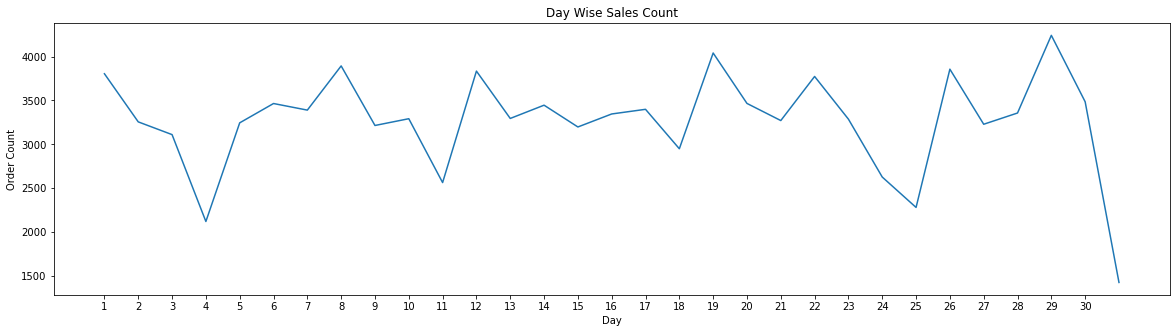

In [17]:
plt.figure(figsize = (20,5))
df.GTOT.groupby(df['Book_Date'].dt.day).count().plot()
plt.xticks(np.arange(1,31, step=1))
plt.title('Day Wise Sales Count')
plt.xlabel('Day')
plt.ylabel('Order Count')
plt.show()

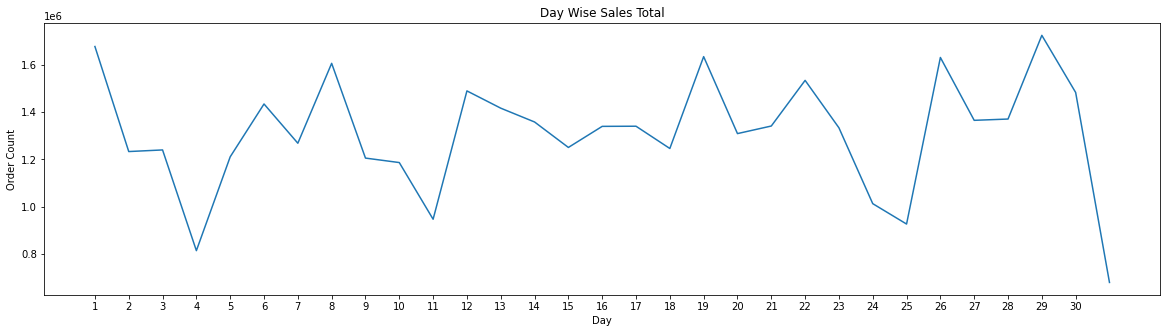

In [18]:
plt.figure(figsize = (20,5))
df.GTOT.groupby(df['Book_Date'].dt.day).sum().plot()
plt.xticks(np.arange(1,31, step=1))
plt.title('Day Wise Sales Total')
plt.xlabel('Day')
plt.ylabel('Order Count')
plt.show()

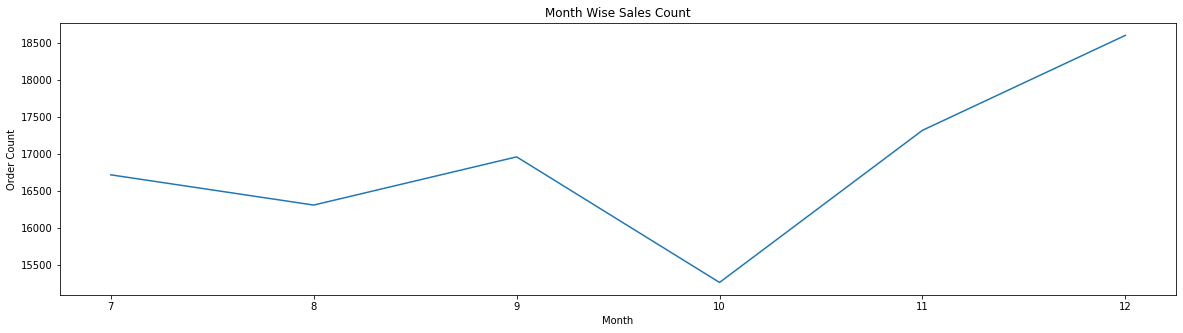

In [20]:
plt.figure(figsize = (20,5))
df.GTOT.groupby(df['Book_Date'].dt.month).count().plot()
plt.title('Month Wise Sales Count')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()

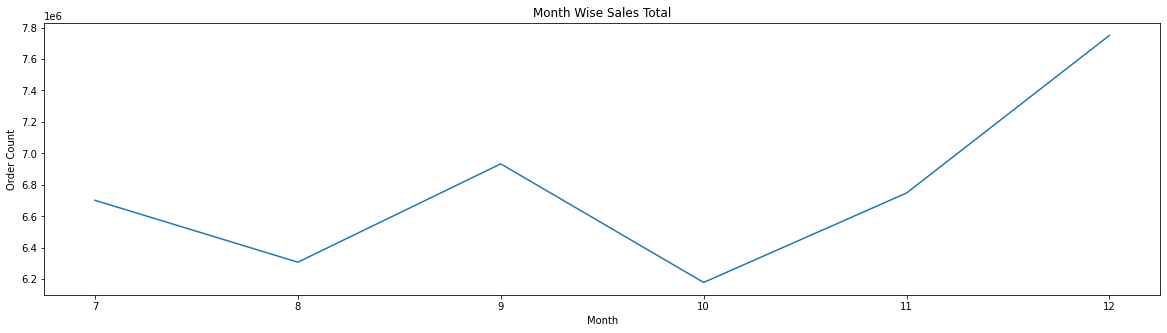

In [21]:
plt.figure(figsize = (20,5))
df.GTOT.groupby(df['Book_Date'].dt.month).sum().plot()
plt.title('Month Wise Sales Total')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()

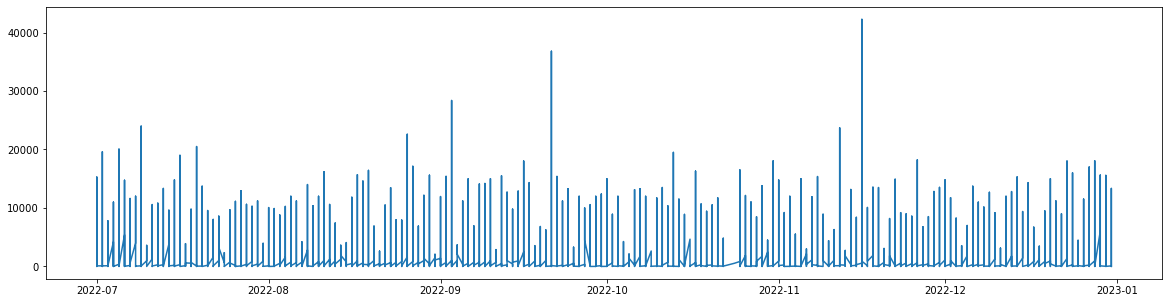

In [22]:
plt.figure(figsize = (20,5))
plt.plot(df.Book_Date,df.GTOT)

In [23]:
data_order = df.loc[:,['Book_Date', 'GTOT']]

In [24]:
data_order = data_order.set_index(['Book_Date'])

In [25]:
data_order.sort_index(inplace=True)

In [26]:
data_order_sales = pd.DataFrame(data_order.resample('D').sum())

In [27]:
data_order_sales

,GTOT
Book_Date,
2022-07-01,282827.53
2022-07-02,203235.00
2022-07-03,30795.00
2022-07-04,283741.52
2022-07-05,228762.00
...,...
2022-12-27,286862.00
2022-12-28,322402.70
2022-12-29,396207.28


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
sales_dec_mul = seasonal_decompose(data_order_sales, model='additive')

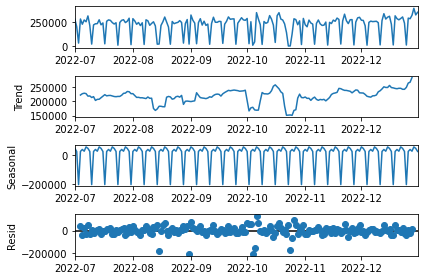

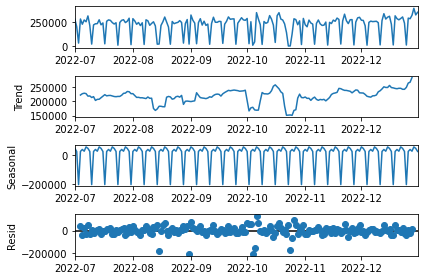

In [30]:
sales_dec_mul.plot()

In [31]:
sales_dec_mul.trend.head(10)

Book_Date
2022-07-01              NaN
2022-07-02              NaN
2022-07-03              NaN
2022-07-04    222492.298571
2022-07-05    227231.000000
2022-07-06    228997.785714
2022-07-07    227483.142857
2022-07-08    218629.854286
2022-07-09    219305.997143
2022-07-10    213787.991429
Freq: D, Name: trend, dtype: float64

In [32]:
sales_dec_mul.seasonal.head(10)

Book_Date
2022-07-01     42976.601615
2022-07-02     22470.205615
2022-07-03   -201013.012614
2022-07-04     22442.198597
2022-07-05     35790.530136
2022-07-06     24168.220465
2022-07-07     53165.256186
2022-07-08     42976.601615
2022-07-09     22470.205615
2022-07-10   -201013.012614
Freq: D, Name: seasonal, dtype: float64

In [33]:
sales_dec_mul.resid.head(10)

Book_Date
2022-07-01             NaN
2022-07-02             NaN
2022-07-03             NaN
2022-07-04    38807.022831
2022-07-05   -34259.530136
2022-07-06    20330.033820
2022-07-07   -26059.399043
2022-07-08    54391.984100
2022-07-09   -26173.702758
2022-07-10     7417.521185
Freq: D, Name: resid, dtype: float64

In [34]:
# Checking Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
data_order_adf = adfuller(data_order_sales)

In [37]:
print('ADF Statistic: ', data_order_adf[0])
print('p-value: %f' % data_order_adf[1])
print('Critical Values:')
for key, value in data_order_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic:  -2.318703707436517
p-value: 0.166007
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


In [38]:
# H Null : There is no Stationarity. Since p-value>0.05 we accpt Null Hupothesis. So We can say there no is Stationarity in the data.

In [39]:
# We should do 1st order differencing. But we will use AutoARIMA which will take care of Differencing

In [40]:
#Applying autoarima
from pmdarima import auto_arima
model_autoarima = auto_arima(data_order_sales) 
model_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2368.265
Date:                Wed, 22 Feb 2023   AIC                           4748.531
Time:                        00:50:33   BIC                           4767.820
Sample:                    07-01-2022   HQIC                          4756.349
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.412e+05   2.88e+04     15.323      0.000    3.85e+05    4.98e+05
ar.L1         -0.4365      0.106     -4.111      0.000      -0.645      -0.228
ar.L2         -0.7524      0.075    -10.077      0.000      -0.899      -0.606
ma.L1          0.7060      0.104      6.779      0.000       0.502       0.910
ma.L2          0.8141      0.086      9.485      0.000       0.646       0.982
sigma2      8.367e+09      0.005   1.79e+12      0.000    8.37e+09    8.37e+09
===================================================================================
Ljung-Box (L1) (Q):                   5.84   Jarque-Bera (JB):                14.94
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.70
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.43e+29. Standard errors may be unstable.
"""

In [41]:
# From Jarque-Bera p-value we can say that residuals are not normally distributed. H Null: Data is normally distributed
# From Ljung-Box test we can say that there is presence auto-correlation. H Null: There is no auto-correraltion.
# From Heteroskedasticity test we can say there is homoskedasticity. H Null: There is no heteroskedasticity

In [42]:
sales_forecast = model_autoarima.predict(n_periods=30)

In [43]:
sales_forecast = pd.DataFrame(sales_forecast, columns=data_order_sales.columns)

In [44]:
sales_forecast

,GTOT
2023-01-01,175176.001987
2023-01-02,213405.941540
2023-01-03,216260.525485
2023-01-04,186248.848705
2023-01-05,197201.610545
2023-01-06,215002.404277
2023-01-07,198990.770366
2023-01-08,192586.181113
2023-01-09,207429.639424
2023-01-10,205769.240040


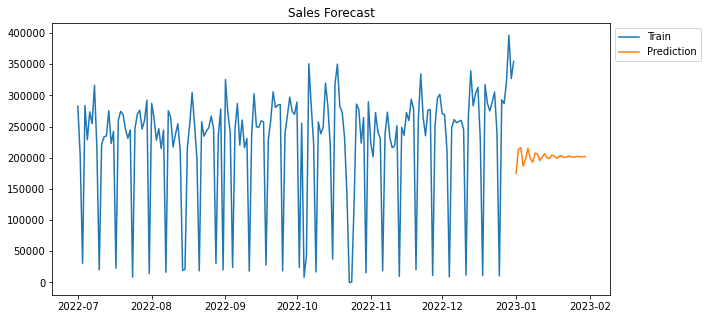

In [45]:
plt.figure(figsize = (10,5))
plt.plot(data_order_sales)
plt.plot(sales_forecast)
plt.title('Sales Forecast')
plt.legend(['Train','Prediction'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [46]:
sales_estimated = model_autoarima.predict_in_sample()

In [47]:
sales_estimated.head()

Book_Date
2022-07-01    201568.779906
2022-07-02    218080.950975
2022-07-03    186289.683991
2022-07-04    159012.718860
2022-07-05    261313.043927
Freq: D, Name: predicted_mean, dtype: float64

In [48]:
# From the above model we can see sales of ₹2,00,000/- will be made every day considering sunday also.

In [49]:
residual_auto = model_autoarima.resid()

In [50]:
residual_auto.head()

Book_Date
2022-07-01     81258.750094
2022-07-02    -14845.950975
2022-07-03   -155494.683991
2022-07-04    124728.801140
2022-07-05    -32551.043927
Freq: D, dtype: float64

<AxesSubplot:ylabel='Count'>

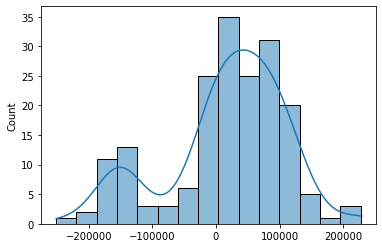

In [51]:
sns.histplot(residual_auto, kde=True)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mse_auto = mean_squared_error(data_order_sales,sales_estimated)

In [54]:
mse_auto

8837608959.806337

In [55]:
mse_auto_1 = (residual_auto**2).sum()/len(residual_auto)

In [56]:
mse_auto_1

8837608959.806337

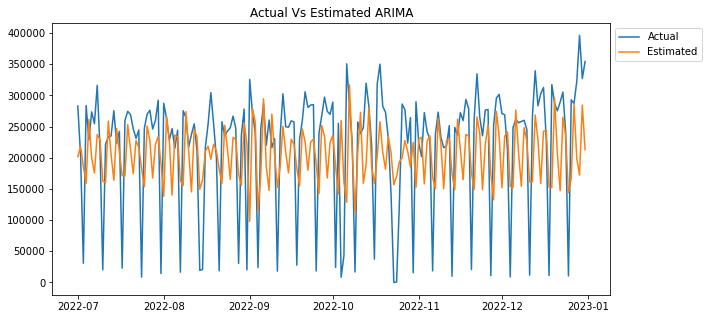

In [57]:
plt.figure(figsize=(10,5))
plt.plot(data_order_sales)
plt.plot(sales_estimated)
plt.title('Actual Vs Estimated ARIMA')
plt.legend(['Actual','Estimated'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

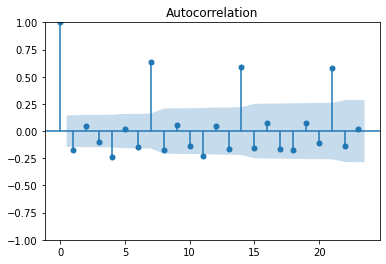

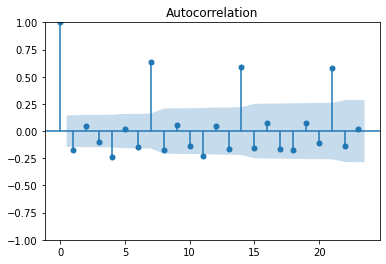

In [59]:
plot_acf(residual_auto)

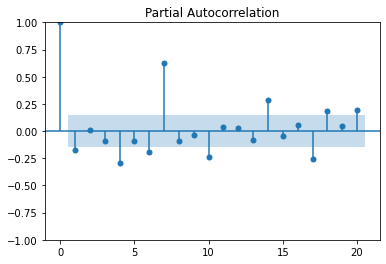

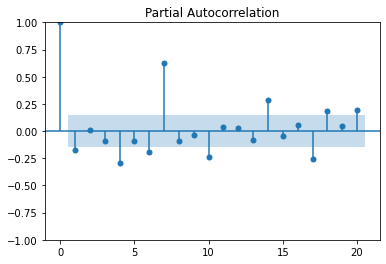

In [60]:
plot_pacf(residual_auto, lags = 20)

In [61]:
# Since there trend and seasonality check with triple exponential Smoothening

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [63]:
model_es = ExponentialSmoothing(data_order_sales, seasonal_periods=30, trend = 'add', seasonal= 'add' ).fit()

In [64]:
model_es.summary()

Dep. Variable:,GTOT,No. Observations:,184
Model:,ExponentialSmoothing,SSE,1818447378517.505
Optimized:,True,AIC,4302.589
Trend:,Additive,BIC,4411.896
Seasonal:,Additive,AICC,4320.711
Seasonal Periods:,30,Date:,"Wed, 22 Feb 2023"
Box-Cox:,False,Time:,00:50:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0322857,beta,True


In [65]:
sales_forecast_es = model_es.forecast(steps=30)

In [66]:
sales_forecast_es

2023-01-01    283507.299232
2023-01-02    178149.647618
2023-01-03    242607.379132
2023-01-04    271687.623352
2023-01-05    250934.232837
2023-01-06    297843.767612
2023-01-07    232673.919811
2023-01-08    292529.891074
2023-01-09    235883.961191
2023-01-10    283454.596083
2023-01-11    280229.301553
2023-01-12    256243.080203
2023-01-13    236269.926543
2023-01-14    262652.315881
2023-01-15    348738.295924
2023-01-16    286734.757478
2023-01-17    302254.111328
2023-01-18    259507.467088
2023-01-19    325283.809763
2023-01-20    233956.740980
2023-01-21    261972.657827
2023-01-22    269191.554394
2023-01-23    240833.203403
2023-01-24    324812.766962
2023-01-25    280266.594610
2023-01-26    334709.809235
2023-01-27    282344.276999
2023-01-28    223688.340253
2023-01-29    367693.594117
2023-01-30    263707.767949
Freq: D, dtype: float64

In [67]:
sales_forecast_es = pd.DataFrame(sales_forecast_es, columns=data_order_sales.columns)

In [68]:
sales_forecast_es

,GTOT
2023-01-01,283507.299232
2023-01-02,178149.647618
2023-01-03,242607.379132
2023-01-04,271687.623352
2023-01-05,250934.232837
2023-01-06,297843.767612
2023-01-07,232673.919811
2023-01-08,292529.891074
2023-01-09,235883.961191
2023-01-10,283454.596083


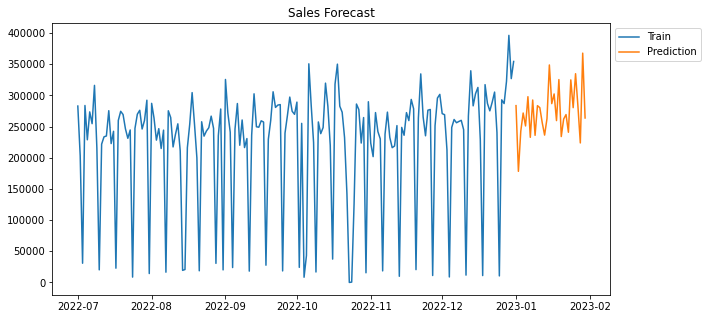

In [69]:
plt.figure(figsize = (10,5))
plt.plot(data_order_sales)
plt.plot(sales_forecast_es)
plt.title('Sales Forecast')
plt.legend(['Train','Prediction'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [71]:
sales_estimated_es = model_es.fittedvalues

In [72]:
sales_estimated_es.head(10)

Book_Date
2022-07-01    217743.388102
2022-07-02    160349.805993
2022-07-03    304866.188805
2022-07-04    188130.241107
2022-07-05    240800.384122
2022-07-06    133401.090451
2022-07-07    202195.233129
2022-07-08    232080.289422
2022-07-09    213542.881696
2022-07-10    259391.619004
Freq: D, dtype: float64

In [73]:
residual_es = model_es.resid

In [74]:
residual_es.head()

Book_Date
2022-07-01     65084.141898
2022-07-02     42885.194007
2022-07-03   -274071.188805
2022-07-04     95611.278893
2022-07-05    -12038.384122
Freq: D, dtype: float64

<AxesSubplot:ylabel='Count'>

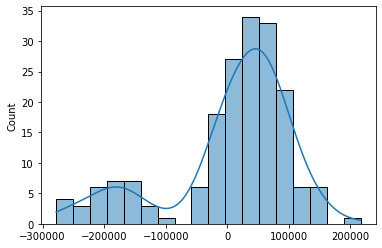

In [75]:
sns.histplot(residual_es, kde=True)

In [76]:
mse_es = mean_squared_error(data_order_sales,sales_estimated_es)

In [77]:
mse_es

9882866187.595139

In [78]:
mse_es_1 = (residual_es**2).sum()/len(residual_es)

In [79]:
mse_es_1

9882866187.595139

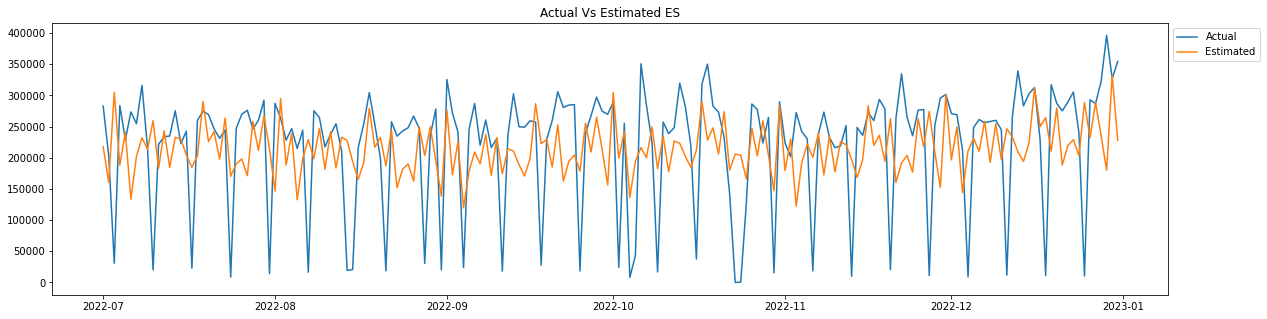

In [80]:
plt.figure(figsize=(20,5))
plt.plot(data_order_sales)
plt.plot(sales_estimated_es)
plt.title('Actual Vs Estimated ES')
plt.legend(['Actual','Estimated'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [81]:
df.drop(['Book_Date', 'S.No'], axis=1, inplace=True)

In [82]:
df

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
0,CREDIT,BLR,CJB,2,27.0,27.0,6.0,162.0,0,0,0,0,0,0,0.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
1,CREDIT,BLR,CJB,10,238.0,238.0,5.0,1190.0,0,0,0,0,0,0,0.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD,SHREE ANJANI COURIER SERVICE PVT. LTD
2,CREDIT,BLR,CJB,28,416.0,416.0,6.0,2496.0,0,0,0,0,0,0,0.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
3,CREDIT,BLR,CJB,3,38.0,38.0,6.0,228.0,0,0,0,0,0,0,0.0,228.0,SHREE NANDAN COURIER LIMITED,SHREE NANDAN COURIER LIMITED
4,CREDIT,BLR,CJB,1,12.0,12.0,9.5,114.0,0,0,0,0,0,0,0.0,114.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101165,CREDIT,VLR,MAA,1,5.0,5.0,6.0,30.0,0,0,0,0,0,0,0.0,30.0,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...
101166,TOPAY,VLR,MAA,2,22.0,22.0,10.0,220.0,0,0,0,0,0,0,0.0,220.0,RELAY EXPREES,SELF
101167,CREDIT,VLR,MAA,1,5.0,5.0,6.0,30.0,0,0,0,0,0,0,0.0,30.0,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...
101168,CREDIT,VPM,MAA,1,5.0,5.0,6.0,30.0,0,0,0,0,0,0,0.0,30.0,CCS EXPRESS & LOGISTICS PRIVATE LIMITED,CCS EXPRESS & LOGISTICS PRIVATE LIMITED


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101169 entries, 0 to 101169
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Book_Type  101169 non-null  object 
 1   ORG        101169 non-null  object 
 2   DEST       101169 non-null  object 
 3   Pcs        101169 non-null  int64  
 4   A.Wgt      101169 non-null  float64
 5   C.Wgt      101169 non-null  float64
 6   Rate       101169 non-null  float64
 7   FRT-AMT    101169 non-null  float64
 8   FOD        101169 non-null  int64  
 9   RISK       101169 non-null  int64  
 10  LR         101169 non-null  int64  
 11  COD        101169 non-null  int64  
 12  DOD        101169 non-null  int64  
 13  HAND       101169 non-null  int64  
 14  OTH        101169 non-null  float64
 15  GTOT       101169 non-null  float64
 16  Consignor  101169 non-null  object 
 17  Consignee  101169 non-null  object 
dtypes: float64(6), int64(7), object(5)
memory usage: 14.7+ MB


In [84]:
df[df['A.Wgt'] != df['C.Wgt']]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
282,CREDIT,CJB,TRP,1,1.0,5.0,6.0,30.0,0,0,0,0,0,0,0.0,30.0,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...
331,CASH,ERD,DRM,2,2.0,20.0,3.0,60.0,0,0,0,0,0,0,0.0,60.0,METRO,METRO
350,CREDIT,ERD,TRP,1,1.0,5.0,5.0,25.0,0,0,0,0,0,0,0.0,25.0,BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED,BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED
376,CREDIT,HYD,MAA,5,125.0,157.0,20.0,3140.0,0,0,0,0,0,0,50.0,3190.0,MEHAK DATA SYSTEMS,DELLOTE
377,CREDIT,HYD,PNQ,3,60.0,75.0,25.0,1875.0,0,0,0,0,0,0,50.0,1925.0,MEHAK DATA SYSTEMS,MEHAK DATA SYSTEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101091,CREDIT,SAL,DND,1,5.0,10.0,3.0,30.0,0,0,0,0,0,0,0.0,30.0,TEAM SPEED PARCEL SERVICE,TEAM SPEED PARCEL SERVICE
101098,CREDIT,SAL,KRG,1,5.0,10.0,3.0,30.0,0,0,0,0,0,0,0.0,30.0,TEAM SPEED PARCEL SERVICE,TEAM SPEED PARCEL SERVICE
101106,TOPAY,SAL1,SVK,2,50.0,475.0,2.0,950.0,0,0,0,0,0,0,0.0,950.0,VASANTH@CO,ConsigneeVASANTH@CO
101153,TOPAY,TRZ,MAA,1,6.0,10.0,10.0,100.0,0,0,0,0,0,0,0.0,100.0,RELAY EXP,RELAY EXP


In [85]:
df.shape

(101169, 18)

In [86]:
df.Book_Type.value_counts()

CREDIT    53029
CASH      36109
TOPAY     11409
FOC         622
Name: Book_Type, dtype: int64

In [87]:
class_label = df.Book_Type.value_counts().index

In [88]:
class_values = df.Book_Type.value_counts().values

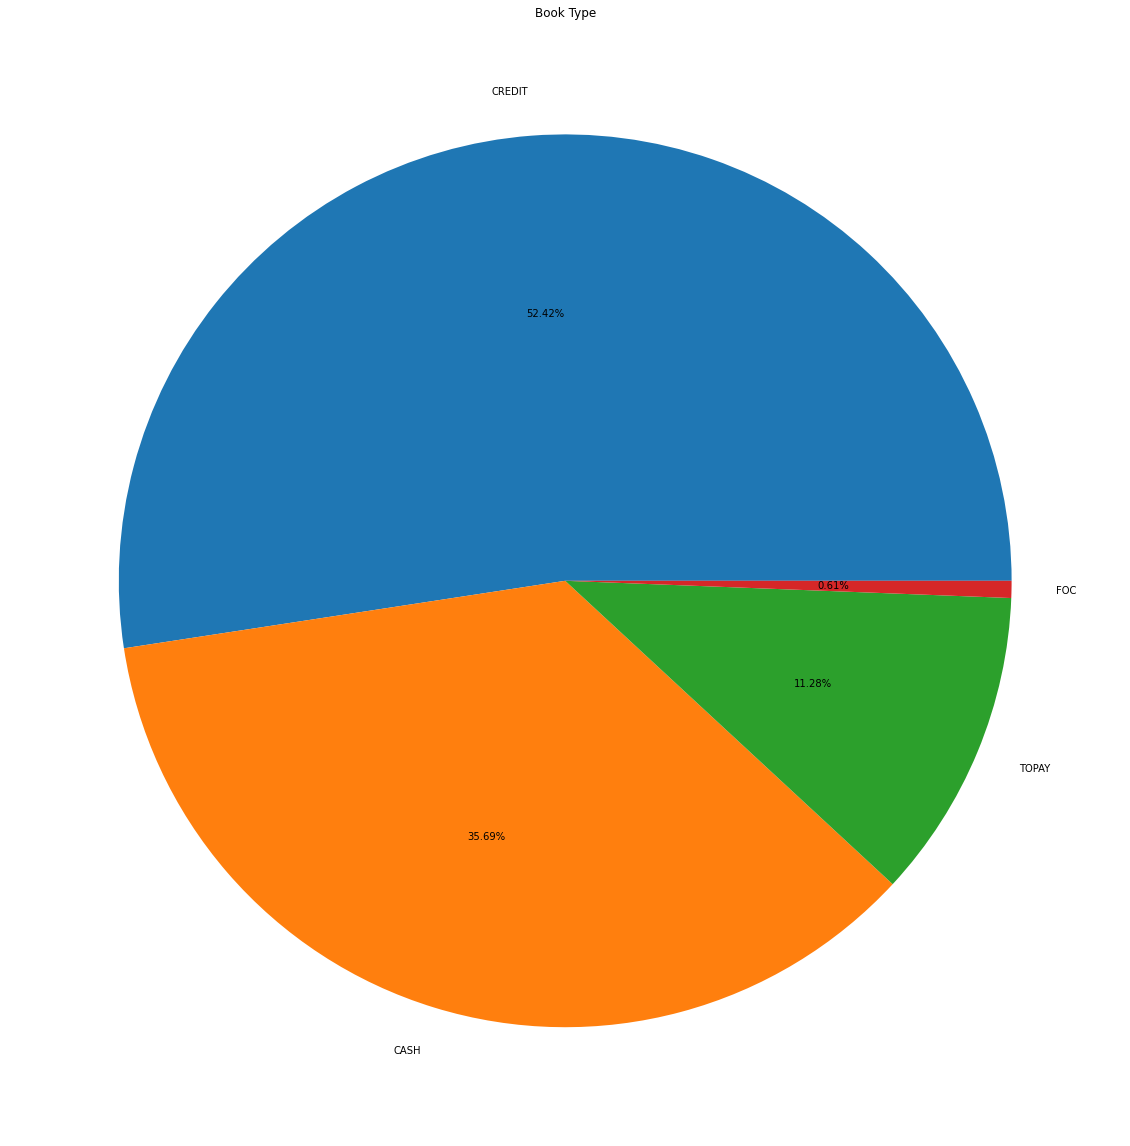

In [89]:
plt.figure(figsize = (20,50))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Book Type")
plt.show()

In [90]:
df.GTOT.groupby(df.Book_Type).sum().sort_values()

Book_Type
FOC           6273.00
TOPAY      6715732.21
CASH      13787322.29
CREDIT    20112480.23
Name: GTOT, dtype: float64

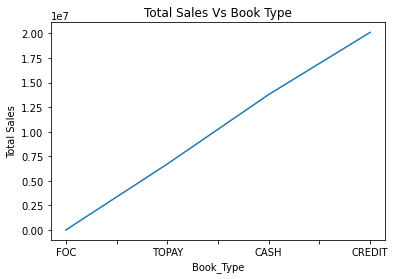

In [91]:
df.GTOT.groupby(df.Book_Type).sum().sort_values().plot()
plt.ylabel('Total Sales')
plt.title('Total Sales Vs Book Type')
plt.show()

In [92]:
df.GTOT.groupby(df.Book_Type).mean().sort_values()

Book_Type
FOC        10.085209
CREDIT    379.273232
CASH      381.825093
TOPAY     588.634605
Name: GTOT, dtype: float64

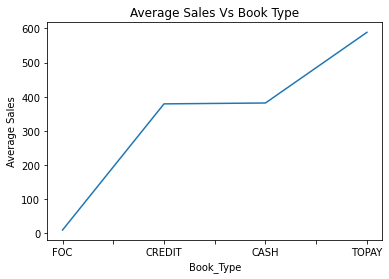

In [93]:
df.GTOT.groupby(df.Book_Type).mean().sort_values().plot()
plt.ylabel('Average Sales')
plt.title('Average Sales Vs Book Type')
plt.show()

In [94]:
df.Pcs.groupby(df.Book_Type).mean().sort_values()

Book_Type
FOC       3.295820
CASH      4.525825
TOPAY     5.186169
CREDIT    6.843878
Name: Pcs, dtype: float64

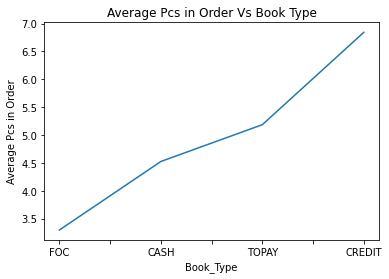

In [95]:
df.Pcs.groupby(df.Book_Type).mean().sort_values().plot()
plt.ylabel('Average Pcs in Order')
plt.title('Average Pcs in Order Vs Book Type')
plt.show()

In [96]:
df['A.Wgt'].groupby(df.Book_Type).mean().sort_values()

Book_Type
FOC       26.959968
CASH      55.245492
CREDIT    77.471316
TOPAY     84.441795
Name: A.Wgt, dtype: float64

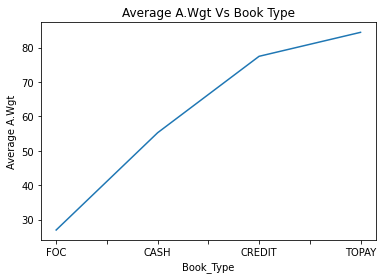

In [97]:
df['A.Wgt'].groupby(df.Book_Type).mean().sort_values().plot()
plt.ylabel('Average A.Wgt')
plt.title('Average A.Wgt Vs Book Type')
plt.show()

In [98]:
df['C.Wgt'].groupby(df.Book_Type).mean().sort_values()

Book_Type
FOC       27.012540
CASH      55.877236
CREDIT    78.205182
TOPAY     84.346614
Name: C.Wgt, dtype: float64

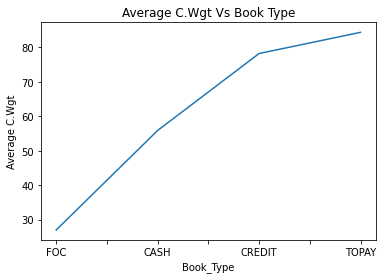

In [99]:
df['C.Wgt'].groupby(df.Book_Type).mean().sort_values().plot()
plt.ylabel('Average C.Wgt')
plt.title('Average C.Wgt Vs Book Type')
plt.show()

In [100]:
# From the above plots we can see credit is opted the customer whose on an average gives 7 peices in order followed by TOPAY with a average of 5 peices in order
# However we can see people who opt TOPAY have significantly higher A.Wgt and C.Wgt compared to Credit

In [101]:
# Analysing Origin

In [102]:
df.ORG.value_counts().head()

BLR    31539
MAA    20917
CJB    10796
SAL     5263
DPM     4888
Name: ORG, dtype: int64

In [103]:
# We can see drastic change the no.of orders between the top 5 origins

In [104]:
class_label = df.ORG.value_counts().index

In [105]:
class_values = df.ORG.value_counts().values

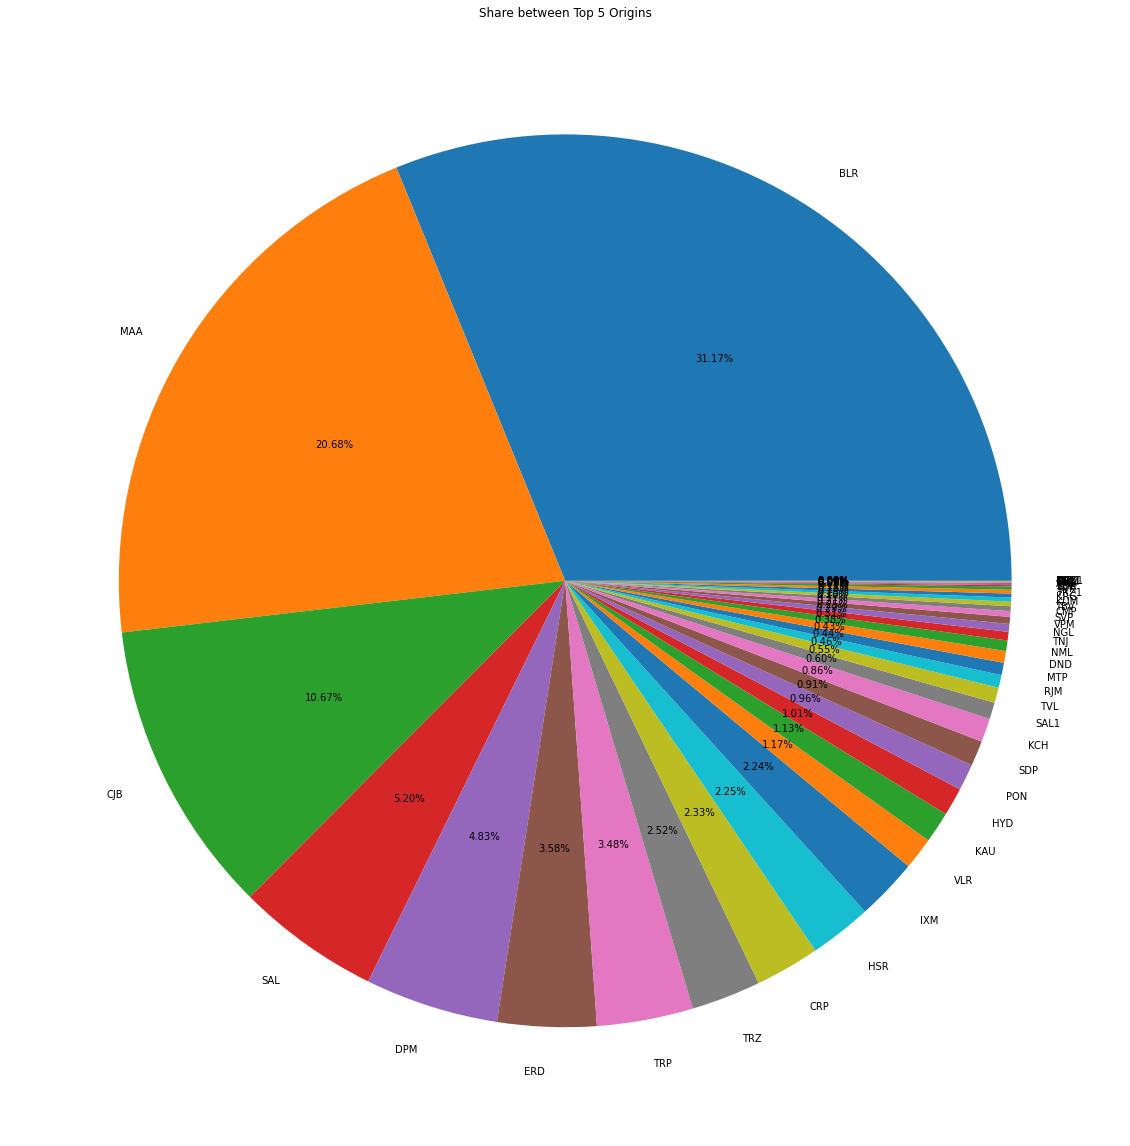

In [106]:
plt.figure(figsize = (20,50))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Share between Top 5 Origins")
plt.show()

In [107]:
# We can see major chunk of orders come from origin BLR, MAA, CJB

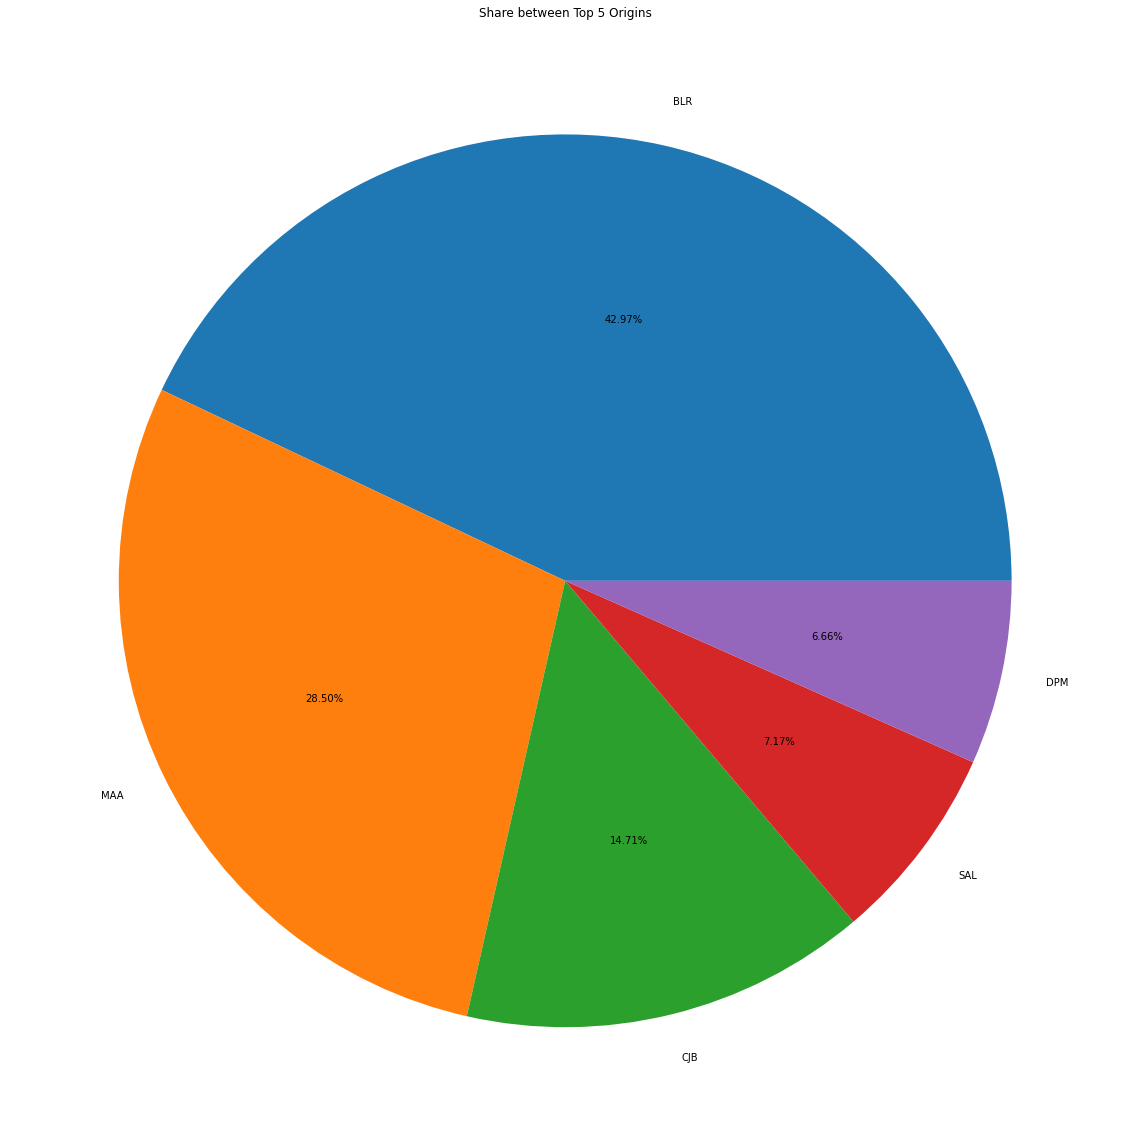

In [108]:
plt.figure(figsize = (20,50))
plt.pie(class_values[:5], labels=class_label[:5], autopct='%1.2f%%')
plt.title("Share between Top 5 Origins")
plt.show()

In [109]:
df.GTOT.groupby(df.ORG).sum().sort_values(ascending=False).head()

ORG
BLR    11113196.97
MAA     7459461.91
CJB     4173409.13
CRP     2829728.60
HYD     2096641.25
Name: GTOT, dtype: float64

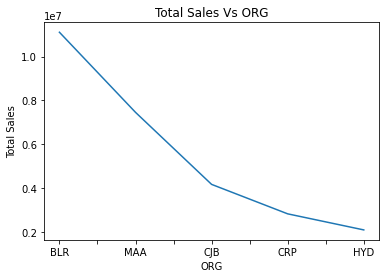

In [110]:
df.GTOT.groupby(df.ORG).sum().sort_values(ascending=False).head().plot()
plt.ylabel('Total Sales')
plt.title('Total Sales Vs ORG')
plt.show()

In [111]:
df.GTOT.groupby(df.ORG).mean().sort_values(ascending=False).head()

ORG
TVL1    11000.000000
GPY      7200.000000
KSC      3900.000000
AMB      2417.352941
CDL      2202.941176
Name: GTOT, dtype: float64

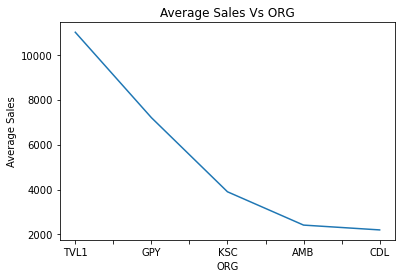

In [112]:
df.GTOT.groupby(df.ORG).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average Sales')
plt.title('Average Sales Vs ORG')
plt.show()

In [113]:
# No point here looking the average sale from destination as place which gives highest average sale doesn't contribute to total sales

In [114]:
df.Pcs.groupby(df.ORG).mean().sort_values(ascending=False).head()

ORG
TVL1    80.000000
MTK     55.000000
CDL     29.176471
HYD     24.143695
AMB     23.617647
Name: Pcs, dtype: float64

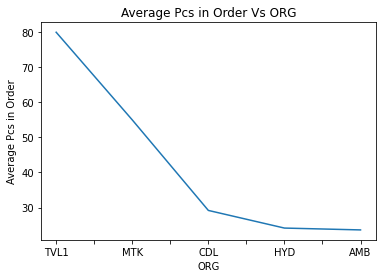

In [115]:
df.Pcs.groupby(df.ORG).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average Pcs in Order')
plt.title('Average Pcs in Order Vs ORG')
plt.show()

In [116]:
# No point here looking the average pcs from destination as it doesn't contribute to total sales
# Hyd represents in top 5 sales contributor also in top 5 pcs wise contributor

In [117]:
df['A.Wgt'].groupby(df.ORG).mean().sort_values(ascending=False).head()

ORG
TVL1    4000.000000
GPY     1000.000000
KSC      390.000000
CDL      367.823529
MTP      324.677060
Name: A.Wgt, dtype: float64

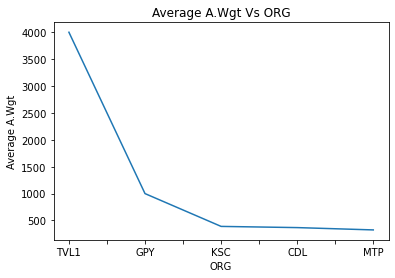

In [118]:
df['A.Wgt'].groupby(df.ORG).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average A.Wgt')
plt.title('Average A.Wgt Vs ORG')
plt.show()

In [119]:
df['C.Wgt'].groupby(df.ORG).mean().sort_values(ascending=False).head()

ORG
TVL1    4000.000000
GPY     1000.000000
KSC      390.000000
CDL      367.823529
MTP      324.886414
Name: C.Wgt, dtype: float64

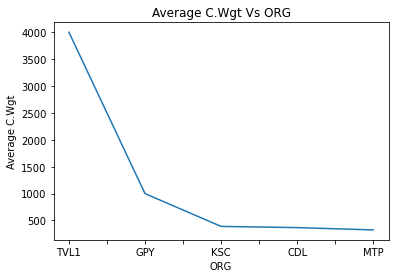

In [120]:
df['C.Wgt'].groupby(df.ORG).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average C.Wgt')
plt.title('Average C.Wgt Vs ORG')
plt.show()

In [121]:
# No point here looking the average wgt from destination as it doesn't contribute to total sales

In [122]:
for i in df.ORG.value_counts().index[df.ORG.value_counts() >=4888]:
    print(i)
    v = df['Book_Type'][df['ORG'] == i].value_counts()
    print('\n',v)  

BLR

 CREDIT    19012
CASH      11703
TOPAY       621
FOC         203
Name: Book_Type, dtype: int64
MAA

 CREDIT    12860
CASH       7527
TOPAY       480
FOC          50
Name: Book_Type, dtype: int64
CJB

 CREDIT    6538
CASH      3486
TOPAY      642
FOC        130
Name: Book_Type, dtype: int64
SAL

 CREDIT    3113
CASH      1691
TOPAY      445
FOC         14
Name: Book_Type, dtype: int64
DPM

 TOPAY     4704
CASH       181
CREDIT       3
Name: Book_Type, dtype: int64


In [123]:
# All the top five origins prefers Credit excapt DPM

In [124]:
# Analysing Destination

In [125]:
df.DEST.value_counts().head()

MAA    15298
BLR    15294
CJB    12829
SAL     6231
IXM     6085
Name: DEST, dtype: int64

In [126]:
class_label = df.DEST.value_counts().index

In [127]:
class_values = df.DEST.value_counts().values

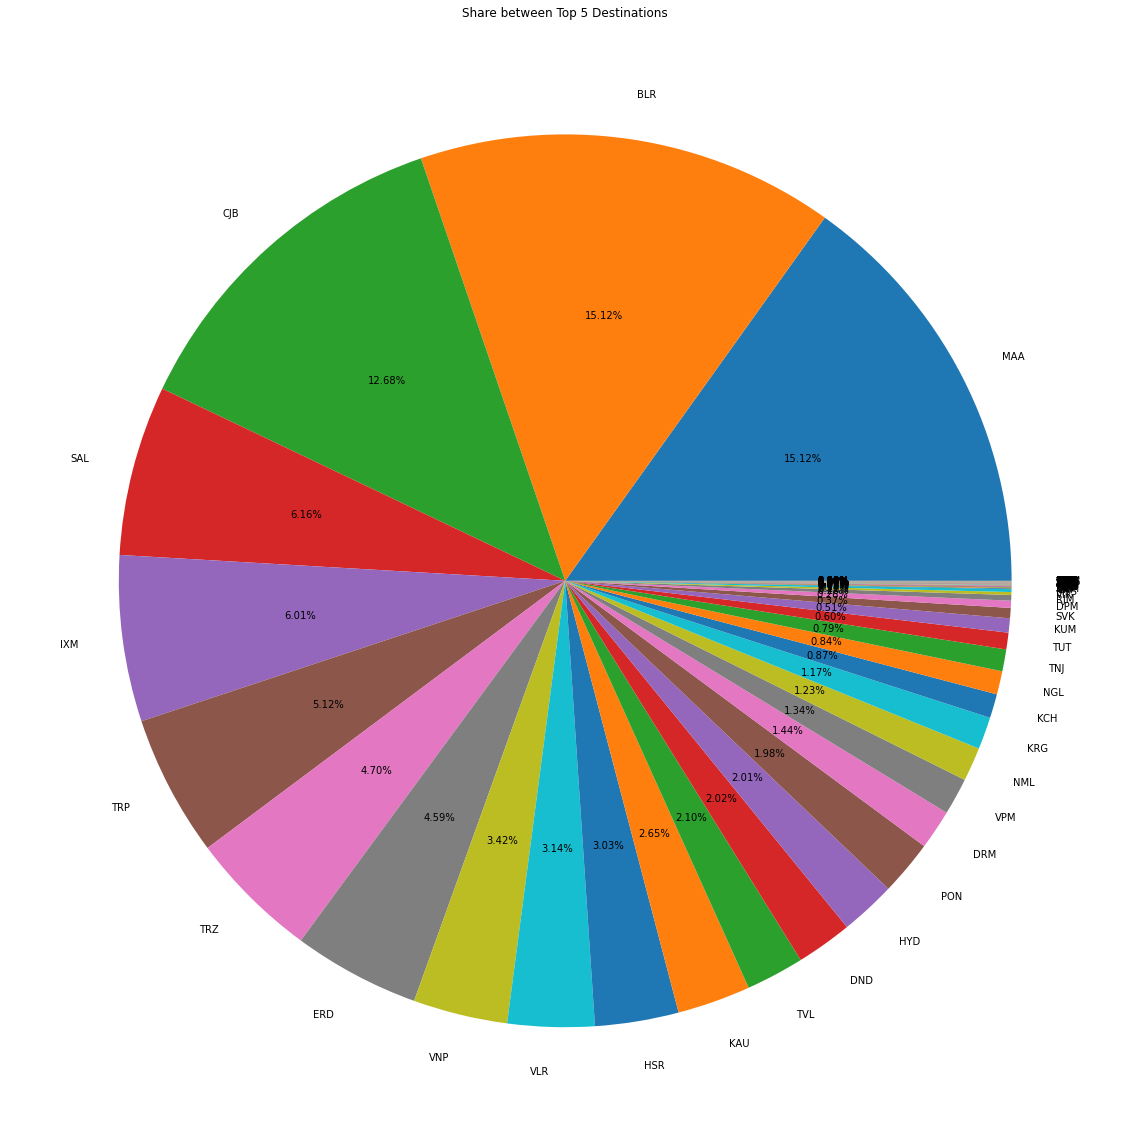

In [128]:
plt.figure(figsize = (20,40))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Share between Top 5 Destinations")
plt.show()

In [129]:
# We can see major chunk of orders come from origin BLR, MAA, CJB

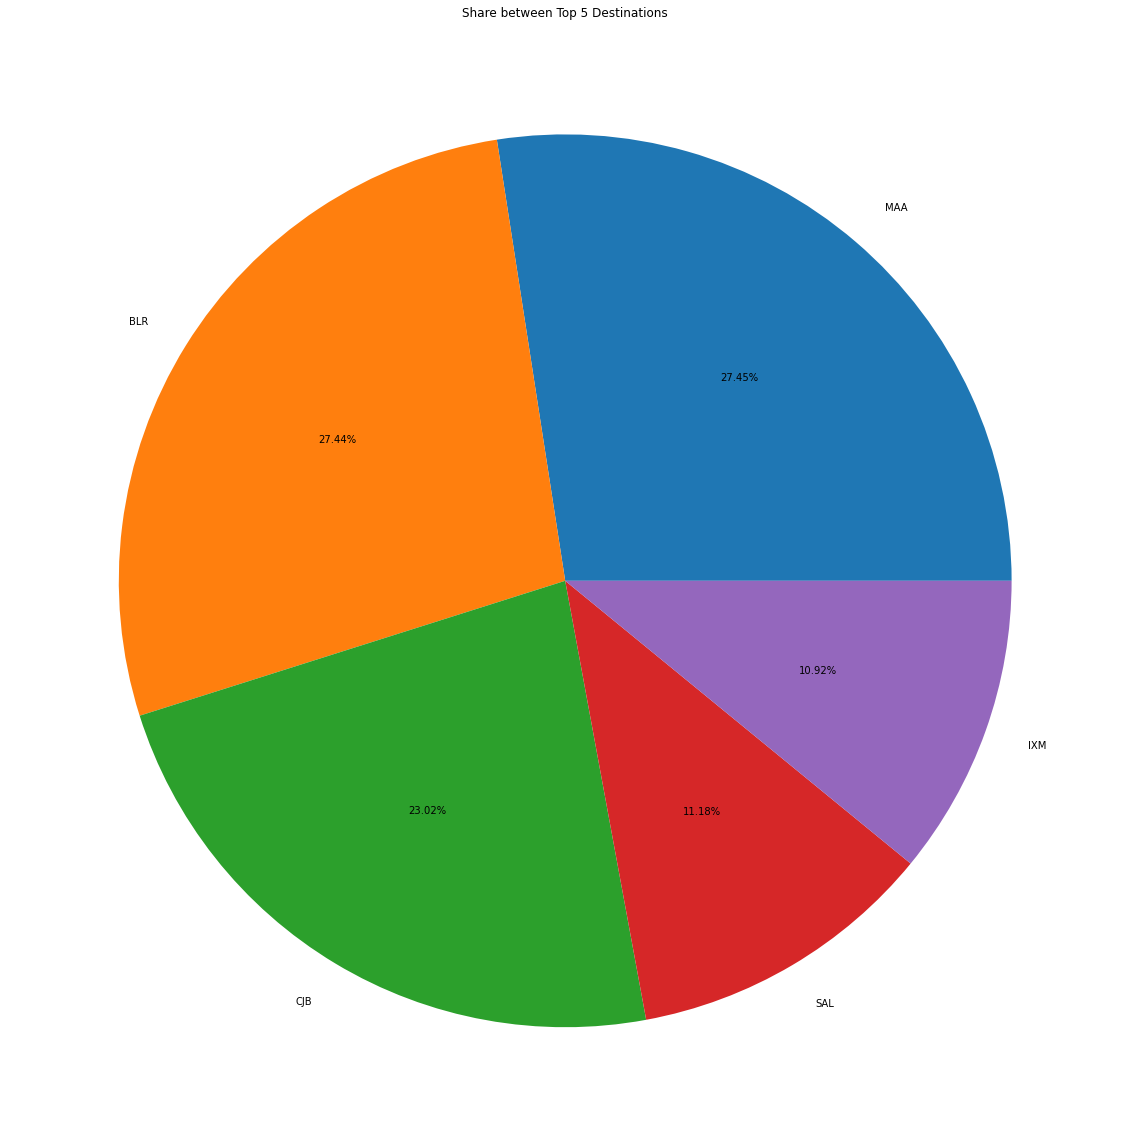

In [130]:
plt.figure(figsize = (20,50))
plt.pie(class_values[:5], labels=class_label[:5], autopct='%1.2f%%')
plt.title("Share between Top 5 Destinations")
plt.show()

In [131]:
df.GTOT.groupby(df.DEST).sum().sort_values(ascending=False).head()

DEST
BLR    8646028.83
MAA    6734077.75
CJB    5453691.20
HYD    3577588.04
IXM    2906855.49
Name: GTOT, dtype: float64

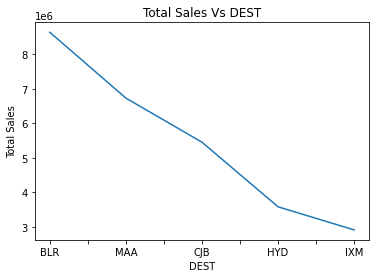

In [132]:
df.GTOT.groupby(df.DEST).sum().sort_values(ascending=False).head().plot()
plt.ylabel('Total Sales')
plt.title('Total Sales Vs DEST')
plt.show()

In [133]:
df.GTOT.groupby(df.DEST).mean().sort_values(ascending=False).head()

DEST
GGN    18587.500000
GUJ    17645.000000
GRN     8643.666667
CDG     5747.500000
AMB     5650.000000
Name: GTOT, dtype: float64

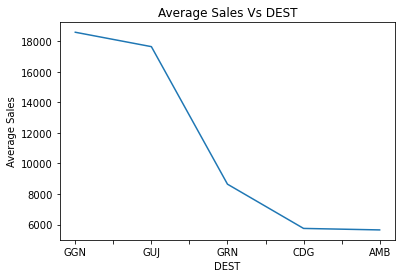

In [134]:
df.GTOT.groupby(df.DEST).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average Sales')
plt.title('Average Sales Vs DEST')
plt.show()

In [135]:
# Highest Avg. ticket size doesn't depending on destination doesn't contribute to total sales

In [136]:
df.Pcs.groupby(df.DEST).mean().sort_values(ascending=False).head()

DEST
GGN    83.250000
APK    50.000000
GUJ    38.000000
MYS    32.038095
TVR    26.000000
Name: Pcs, dtype: float64

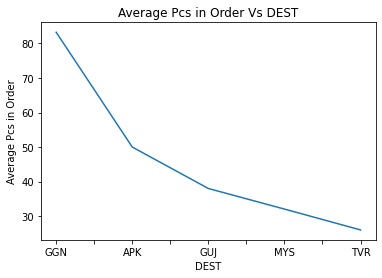

In [137]:
df.Pcs.groupby(df.DEST).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average Pcs in Order')
plt.title('Average Pcs in Order Vs DEST')
plt.show()

In [138]:
df['A.Wgt'].groupby(df.DEST).mean().sort_values(ascending=False).head()

DEST
APK    900.00
GGN    833.25
GUJ    469.00
SNG    440.00
TVR    430.00
Name: A.Wgt, dtype: float64

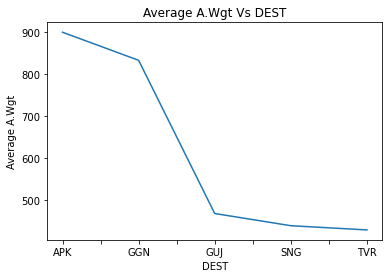

In [139]:
df['A.Wgt'].groupby(df.DEST).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average A.Wgt')
plt.title('Average A.Wgt Vs DEST')
plt.show()

In [140]:
df['C.Wgt'].groupby(df.DEST).mean().sort_values(ascending=False).head()

DEST
APK    900.00
GGN    861.25
GUJ    586.50
SNG    440.00
TVR    430.00
Name: C.Wgt, dtype: float64

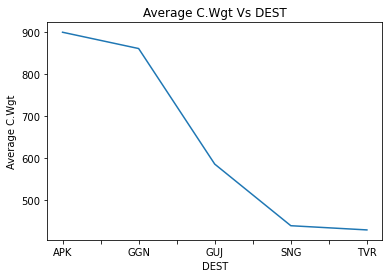

In [141]:
df['C.Wgt'].groupby(df.DEST).mean().sort_values(ascending=False).head().plot()
plt.ylabel('Average C.Wgt')
plt.title('Average C.Wgt Vs DEST')
plt.show()

In [142]:
# Highest Avg. wgt doesn't depending on destination doesn't contribute to total sales

In [143]:
df.DEST.value_counts()

MAA    15298
BLR    15294
CJB    12829
SAL     6231
IXM     6085
       ...  
SNG        1
MNP        1
IDR        1
OTY        1
NGP        1
Name: DEST, Length: 96, dtype: int64

In [144]:
for i in df.DEST.value_counts().index[df.DEST.value_counts() >=6000]:
    print(i)
    v = df['Book_Type'][df['ORG'] == i].value_counts()
    print('\n',v)  

MAA

 CREDIT    12860
CASH       7527
TOPAY       480
FOC          50
Name: Book_Type, dtype: int64
BLR

 CREDIT    19012
CASH      11703
TOPAY       621
FOC         203
Name: Book_Type, dtype: int64
CJB

 CREDIT    6538
CASH      3486
TOPAY      642
FOC        130
Name: Book_Type, dtype: int64
SAL

 CREDIT    3113
CASH      1691
TOPAY      445
FOC         14
Name: Book_Type, dtype: int64
IXM

 CREDIT    1495
CASH       686
TOPAY       66
FOC         17
Name: Book_Type, dtype: int64


In [145]:
# Credit is the favourite option across all Top 5 Cities

In [146]:
df['Consignor'][df['Book_Type'] == 'TOPAY'].value_counts().head()

KARTHIKUMAR          378
VELAMMAL GARMENTS    289
AATHI TEX            274
SST                  224
VASANTH@CO           215
Name: Consignor, dtype: int64

In [147]:
# From above data we can clearly see contribution by Customer opting for TOPAY is significantly less towards total sales but their
# ticket size is high. These group of customers if focussed and can bring significant difference in revenue

In [148]:
# Let's look into top Consignors. 

In [149]:
df.Consignor.value_counts()[df.Consignor.value_counts() >=1200]

C1190-GMS WORLDWIDE EXPRESS PVT LTD                   7725
1050-CRITICALOG INDIA PVT LTD                         3254
1005-CRITICALOG INDIA PVT LTD                         3169
VELEX                                                 2842
1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED            2100
PCS EXPRESS LOGISTICS                                 1899
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE    1778
AVIKAM LOGISTICS PRIVATE LIMITED                      1728
TEAM SPEED PARCEL SERVICE                             1647
1010-GMS WORLDWIDE EXPRESS PVT LTD                    1624
MLC COURIER & CARGO                                   1559
BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED         1210
Name: Consignor, dtype: int64

<AxesSubplot:>

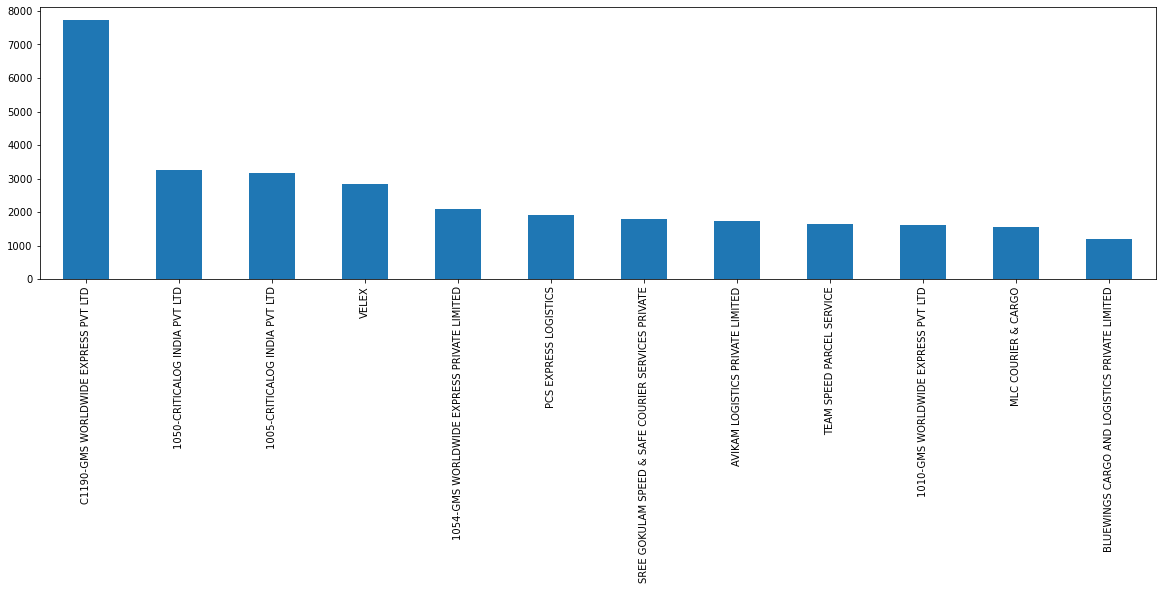

In [150]:
plt.figure(figsize=(20,5))
df.Consignor.value_counts()[df.Consignor.value_counts() >=1200].plot(kind='bar')

In [151]:
# Considering 1200 orders in 6 months, which means 200 orders a month

In [152]:
for i in df.Consignor.value_counts().index[df.Consignor.value_counts() >=1200]:
    print(i)
    v = df['Book_Type'][df['Consignor'] == i].value_counts()
    print('\n',v)  

C1190-GMS WORLDWIDE EXPRESS PVT LTD

 CREDIT    7724
FOC          1
Name: Book_Type, dtype: int64
1050-CRITICALOG INDIA PVT LTD

 CREDIT    3254
Name: Book_Type, dtype: int64
1005-CRITICALOG INDIA PVT LTD

 CREDIT    3169
Name: Book_Type, dtype: int64
VELEX

 CASH     2735
TOPAY     105
FOC         2
Name: Book_Type, dtype: int64
1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED

 CREDIT    2099
FOC          1
Name: Book_Type, dtype: int64
PCS EXPRESS LOGISTICS

 CREDIT    1899
Name: Book_Type, dtype: int64
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE

 CREDIT    1778
Name: Book_Type, dtype: int64
AVIKAM LOGISTICS PRIVATE LIMITED

 CREDIT    1726
FOC          2
Name: Book_Type, dtype: int64
TEAM SPEED PARCEL SERVICE

 CREDIT    1646
FOC          1
Name: Book_Type, dtype: int64
1010-GMS WORLDWIDE EXPRESS PVT LTD

 CREDIT    1623
FOC          1
Name: Book_Type, dtype: int64
MLC COURIER & CARGO

 CREDIT    1559
Name: Book_Type, dtype: int64
BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED

 C

In [153]:
top_consignor = df[(df.Consignor == 'C1190-GMS WORLDWIDE EXPRESS PVT LTD')|(df.Consignor == '1050-CRITICALOG INDIA PVT LTD')|(df.Consignor == '1005-CRITICALOG INDIA PVT LTD')|(df.Consignor == 'VELEX')|(df.Consignor == '1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED')|(df.Consignor == 'PCS EXPRESS LOGISTICS')|(df.Consignor == 'SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE')|(df.Consignor == 'AVIKAM LOGISTICS PRIVATE LIMITED')|(df.Consignor == 'TEAM SPEED PARCEL SERVICE')|(df.Consignor == '1010-GMS WORLDWIDE EXPRESS PVT LTD')|(df.Consignor == 'MLC COURIER & CARGO')|(df.Consignor == 'BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED')]

In [154]:
top_consignor.Consignor.value_counts()

C1190-GMS WORLDWIDE EXPRESS PVT LTD                   7725
1050-CRITICALOG INDIA PVT LTD                         3254
1005-CRITICALOG INDIA PVT LTD                         3169
VELEX                                                 2842
1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED            2100
PCS EXPRESS LOGISTICS                                 1899
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE    1778
AVIKAM LOGISTICS PRIVATE LIMITED                      1728
TEAM SPEED PARCEL SERVICE                             1647
1010-GMS WORLDWIDE EXPRESS PVT LTD                    1624
MLC COURIER & CARGO                                   1559
BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED         1210
Name: Consignor, dtype: int64

In [155]:
top_consignor

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
4,CREDIT,BLR,CJB,1,12.0,12.0,9.50,114.0,0,0,0,0,0,0,0.0,114.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD
6,CREDIT,BLR,CJB,2,36.0,36.0,9.50,342.0,0,0,0,0,0,0,0.0,342.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD
20,CREDIT,BLR,CJB,1,11.0,11.0,5.00,55.0,0,0,0,0,0,0,0.0,55.0,PCS EXPRESS LOGISTICS,PCS EXPRESS LOGISTICS
22,CREDIT,BLR,CJB,1,11.0,11.0,7.00,77.0,0,0,0,0,0,0,0.0,77.0,AVIKAM LOGISTICS PRIVATE LIMITED,AVIKAM LOGISTICS PRIVATE LIMITED
35,CASH,BLR,CJB,2,17.0,17.0,7.06,120.0,0,0,0,0,0,0,0.0,120.0,VELEX,SELF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101160,CASH,TVL,TRP,1,5.0,10.0,10.00,100.0,0,0,0,0,0,0,0.0,100.0,VELEX,VELEX
101164,CREDIT,VLR,MAA,1,5.0,5.0,3.00,15.0,0,0,0,0,0,0,0.0,15.0,C1190-GMS WORLDWIDE EXPRESS PVT LTD,C1190-GMS WORLDWIDE EXPRESS PVT LTD
101165,CREDIT,VLR,MAA,1,5.0,5.0,6.00,30.0,0,0,0,0,0,0,0.0,30.0,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...
101167,CREDIT,VLR,MAA,1,5.0,5.0,6.00,30.0,0,0,0,0,0,0,0.0,30.0,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...,SREE GOKULAM SPEED & SAFE COURIER SERVICES PRI...


In [156]:
top_consignor[top_consignor.OTH != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
46,CREDIT,BLR,CJB,33,530.0,530.0,4.0,2120.0,0,0,0,0,0,0,20.0,2140.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
64,CREDIT,BLR,ERD,1,12.0,12.0,4.0,48.0,0,0,0,0,0,0,20.0,68.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
89,CREDIT,BLR,IXM,2,25.0,25.0,4.0,100.0,0,0,0,0,0,0,20.0,120.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100,CREDIT,BLR,KCH,9,160.0,160.0,4.0,640.0,0,0,0,0,0,0,20.0,660.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
135,CREDIT,BLR,NML,1,14.0,14.0,4.0,56.0,0,0,0,0,0,0,20.0,76.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100655,CREDIT,BLR,TRP,1,3.0,3.0,4.0,12.0,0,0,0,0,0,0,20.0,32.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100664,CREDIT,BLR,TRZ,1,21.0,21.0,4.0,84.0,0,0,0,0,0,0,20.0,104.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100670,CREDIT,BLR,TVL,4,91.0,91.0,4.0,364.0,0,0,0,0,0,0,20.0,384.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100678,CREDIT,BLR,VLR,1,5.0,5.0,4.0,20.0,0,0,0,0,0,0,20.0,40.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD


In [157]:
top_consignor[top_consignor.FOD != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee


In [158]:
top_consignor[top_consignor.RISK != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee


In [159]:
top_consignor[top_consignor.LR != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee


In [160]:
top_consignor[top_consignor.COD != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee


In [161]:
top_consignor[top_consignor.DOD != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee


In [162]:
top_consignor[top_consignor.HAND != 0]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee


In [163]:
top_consignor[top_consignor['FRT-AMT'] != top_consignor.GTOT]

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
46,CREDIT,BLR,CJB,33,530.0,530.0,4.0,2120.0,0,0,0,0,0,0,20.0,2140.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
64,CREDIT,BLR,ERD,1,12.0,12.0,4.0,48.0,0,0,0,0,0,0,20.0,68.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
89,CREDIT,BLR,IXM,2,25.0,25.0,4.0,100.0,0,0,0,0,0,0,20.0,120.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100,CREDIT,BLR,KCH,9,160.0,160.0,4.0,640.0,0,0,0,0,0,0,20.0,660.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
135,CREDIT,BLR,NML,1,14.0,14.0,4.0,56.0,0,0,0,0,0,0,20.0,76.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100655,CREDIT,BLR,TRP,1,3.0,3.0,4.0,12.0,0,0,0,0,0,0,20.0,32.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100664,CREDIT,BLR,TRZ,1,21.0,21.0,4.0,84.0,0,0,0,0,0,0,20.0,104.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100670,CREDIT,BLR,TVL,4,91.0,91.0,4.0,364.0,0,0,0,0,0,0,20.0,384.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD
100678,CREDIT,BLR,VLR,1,5.0,5.0,4.0,20.0,0,0,0,0,0,0,20.0,40.0,1010-GMS WORLDWIDE EXPRESS PVT LTD,1010-GMS WORLDWIDE EXPRESS PVT LTD


In [164]:
top_consignor.head()

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
4,CREDIT,BLR,CJB,1,12.0,12.0,9.50,114.0,0,0,0,0,0,0,0.0,114.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD
6,CREDIT,BLR,CJB,2,36.0,36.0,9.50,342.0,0,0,0,0,0,0,0.0,342.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD
20,CREDIT,BLR,CJB,1,11.0,11.0,5.00,55.0,0,0,0,0,0,0,0.0,55.0,PCS EXPRESS LOGISTICS,PCS EXPRESS LOGISTICS
22,CREDIT,BLR,CJB,1,11.0,11.0,7.00,77.0,0,0,0,0,0,0,0.0,77.0,AVIKAM LOGISTICS PRIVATE LIMITED,AVIKAM LOGISTICS PRIVATE LIMITED
35,CASH,BLR,CJB,2,17.0,17.0,7.06,120.0,0,0,0,0,0,0,0.0,120.0,VELEX,SELF


In [165]:
# We can see that FRT-AMT + OTH = GTOT. Since we are only concerened about GTOT, we will drop FRT-AMT and OTH

In [166]:
# We will also delete Consignee as Consignor pays bill and we have analysed which city is more in focus for delivery

In [167]:
# We will only consider C.wgt which is the weight after packing which matters

In [168]:
top_consignor.drop(['FOD','RISK','LR','COD','DOD','HAND','OTH', 'FRT-AMT', 'A.Wgt', 'Consignee'], axis=1, inplace=True)

In [169]:
top_consignor.head()

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Consignor
4,CREDIT,BLR,CJB,1,12.0,9.50,114.0,1005-CRITICALOG INDIA PVT LTD
6,CREDIT,BLR,CJB,2,36.0,9.50,342.0,1005-CRITICALOG INDIA PVT LTD
20,CREDIT,BLR,CJB,1,11.0,5.00,55.0,PCS EXPRESS LOGISTICS
22,CREDIT,BLR,CJB,1,11.0,7.00,77.0,AVIKAM LOGISTICS PRIVATE LIMITED
35,CASH,BLR,CJB,2,17.0,7.06,120.0,VELEX


In [170]:
top_consignor.Book_Type.value_counts()

CREDIT    27686
CASH       2735
TOPAY       105
FOC           9
Name: Book_Type, dtype: int64

In [171]:
# From the above data credit facilty is clear favourite of top Consignors except Velex

In [172]:
top_consignor.ORG.value_counts().head()

BLR    10241
MAA     5177
CJB     3815
SAL     2876
TRZ     1114
Name: ORG, dtype: int64

In [173]:
top_consignor.groupby(['ORG','DEST']).size()

ORG  DEST
BLR  CJB     1380
     DND      346
     DRM      183
     ERD      553
     HSR      351
             ... 
VPM  TRP        1
     TRZ        2
     TVR        1
     VIR        1
     VLR        2
Length: 403, dtype: int64

In [174]:
top_consignor.Consignor[(top_consignor.ORG == 'BLR')&(top_consignor.DEST == 'CJB')].unique()

array(['1005-CRITICALOG INDIA PVT LTD', 'PCS EXPRESS LOGISTICS',
       'AVIKAM LOGISTICS PRIVATE LIMITED', 'VELEX',
       '1010-GMS WORLDWIDE EXPRESS PVT LTD'], dtype=object)

In [175]:
# Highest number of Consignments are going from Bangalore To Coimbatore. Though this route has highest traffic, it is not significant
# because it contributes less than 5% of the total number of consignments.

In [176]:
top_consignor.describe()

,Pcs,C.Wgt,Rate,GTOT
count,30535.000000,30535.000000,30535.000000,30535.000000
mean,5.580907,56.163304,5.887237,218.694432
std,18.083552,182.936877,3.695171,666.987697
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,4.000000,3.000000,24.000000
50%,1.000000,9.000000,5.000000,50.000000
75%,3.000000,31.000000,9.500000,150.000000
max,624.000000,5000.000000,80.000000,36800.000000


In [177]:
top_consignor.GTOT.groupby(top_consignor.Consignor).describe()

,count,mean,std,min,25%,50%,75%,max
Consignor,,,,,,,,
1005-CRITICALOG INDIA PVT LTD,3169.0,104.301830,265.976341,9.5,9.500,28.5,95.0,5446.0
1010-GMS WORLDWIDE EXPRESS PVT LTD,1624.0,346.127463,856.212357,24.0,44.000,96.0,288.0,18020.0
1050-CRITICALOG INDIA PVT LTD,3254.0,188.781623,515.242279,9.5,43.225,66.5,161.5,16198.0
1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED,2100.0,491.125714,1016.103794,0.0,30.000,138.0,450.0,13506.0
AVIKAM LOGISTICS PRIVATE LIMITED,1728.0,294.487847,893.203390,0.0,33.750,60.0,210.0,13720.0
BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED,1210.0,143.147934,246.163301,0.0,30.000,55.0,140.0,4668.0
C1190-GMS WORLDWIDE EXPRESS PVT LTD,7725.0,278.510757,867.417990,3.0,12.000,45.0,189.0,36800.0
MLC COURIER & CARGO,1559.0,135.559333,167.878437,0.0,35.000,75.0,180.0,1548.0
PCS EXPRESS LOGISTICS,1899.0,98.216956,224.736585,0.0,15.000,24.0,60.0,3250.0


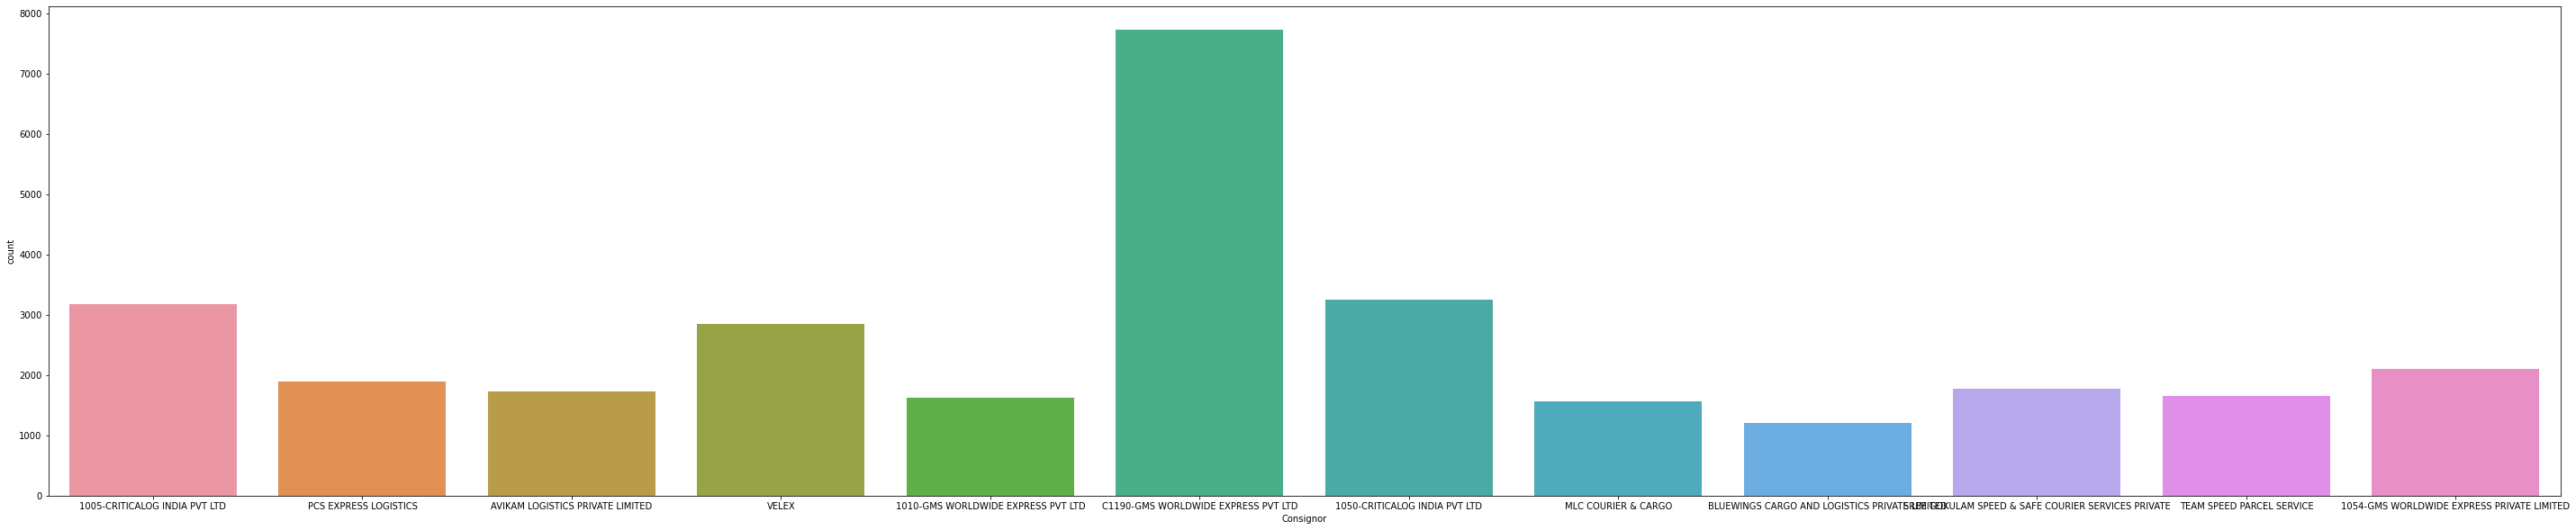

In [178]:
plt.figure(figsize=(50,10))
sns.countplot(x =top_consignor['Consignor'])
plt.show()

In [179]:
top_consignor['GTOT'].groupby(top_consignor['Consignor']).sum().sort_values(ascending=False)

Consignor
C1190-GMS WORLDWIDE EXPRESS PVT LTD                   2151495.60
1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED            1031364.00
1050-CRITICALOG INDIA PVT LTD                          614295.40
1010-GMS WORLDWIDE EXPRESS PVT LTD                     562111.00
AVIKAM LOGISTICS PRIVATE LIMITED                       508875.00
TEAM SPEED PARCEL SERVICE                              450818.50
VELEX                                                  370434.00
1005-CRITICALOG INDIA PVT LTD                          330532.50
MLC COURIER & CARGO                                    211337.00
PCS EXPRESS LOGISTICS                                  186514.00
BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED          173209.00
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE      86848.48
Name: GTOT, dtype: float64

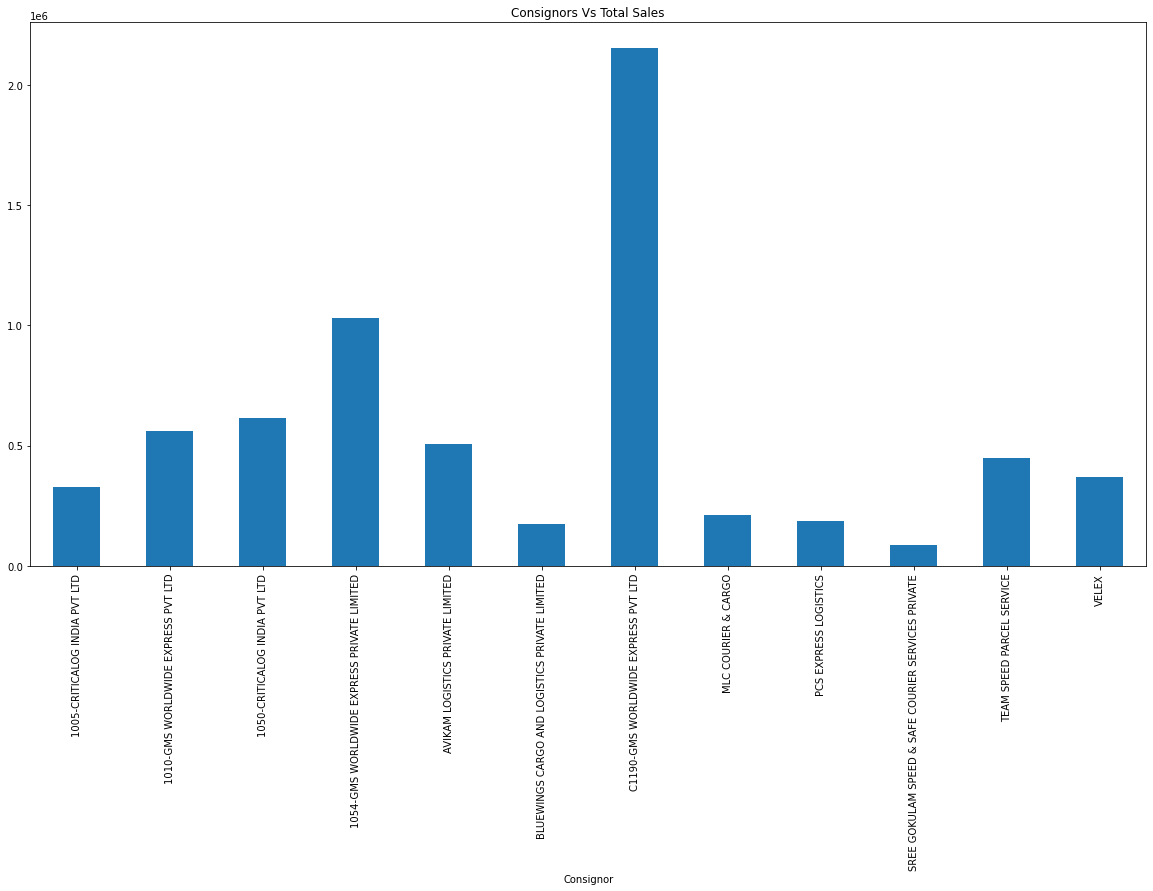

In [180]:
plt.figure(figsize=(20,10))
top_consignor['GTOT'].groupby(top_consignor['Consignor']).sum().plot(kind = 'bar')
plt.title('Consignors Vs Total Sales')
plt.show()

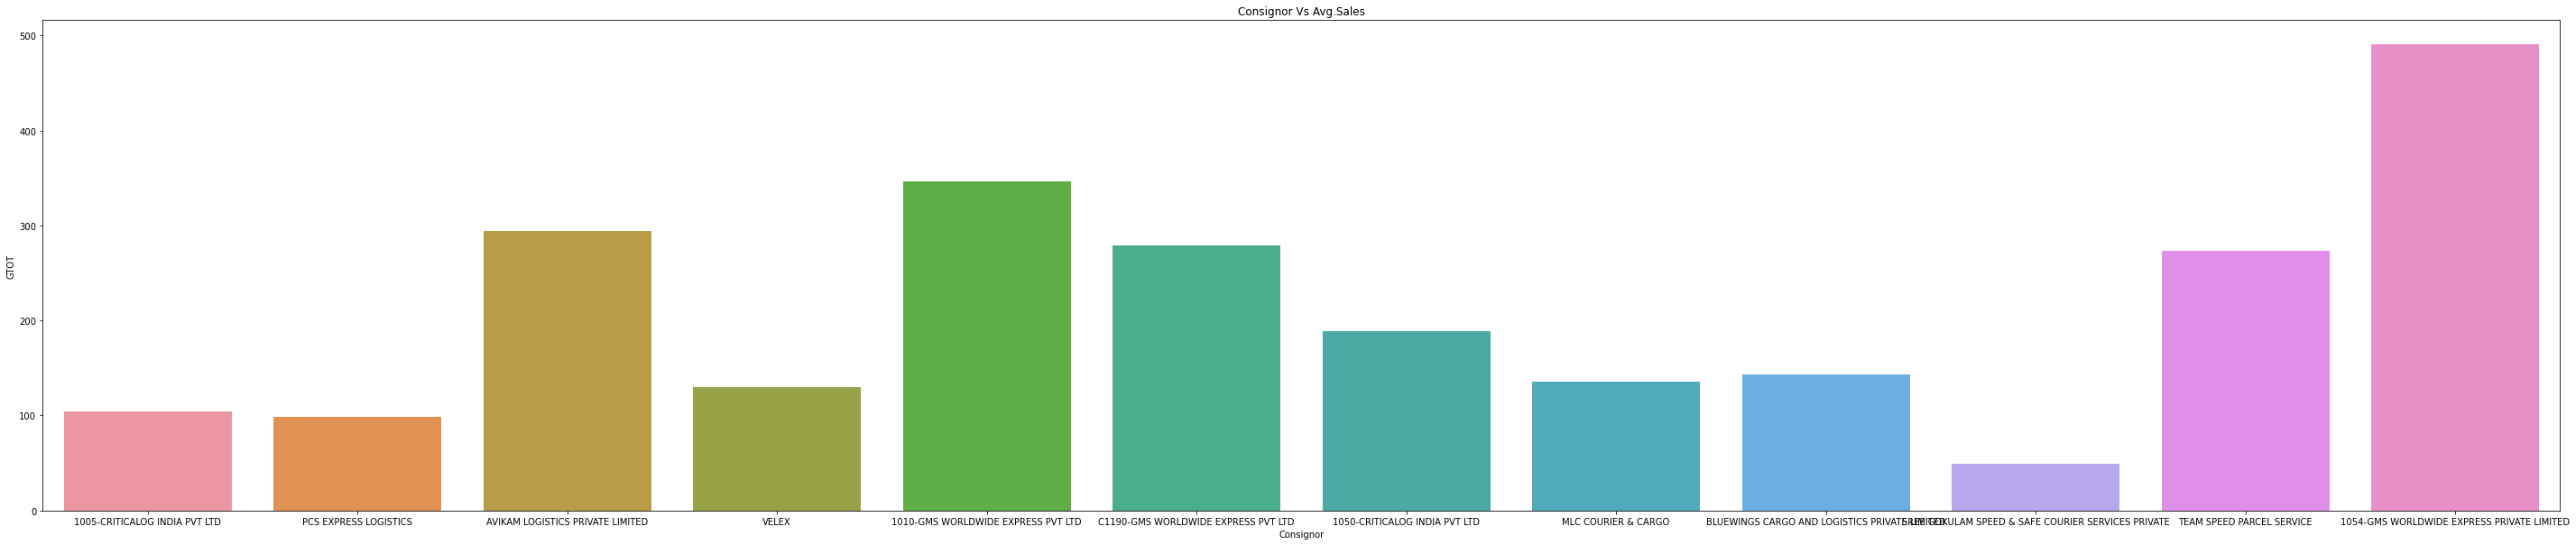

In [181]:
plt.figure(figsize=(50,10))
sns.barplot(x = top_consignor['Consignor'], y= top_consignor['GTOT'], ci=False)
plt.title('Consignor Vs Avg.Sales')
plt.show()

In [182]:
top_consignor.GTOT.groupby(top_consignor.Book_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Book_Type,,,,,,,,
CASH,2735.0,133.291773,501.539338,0.0,50.0,50.0,70.0,9980.0
CREDIT,27686.0,227.803853,681.829143,0.0,24.0,48.0,165.0,36800.0
FOC,9.0,47.000000,139.878519,0.0,0.0,0.0,0.0,420.0
TOPAY,105.0,56.009524,26.223703,10.0,50.0,50.0,50.0,280.0


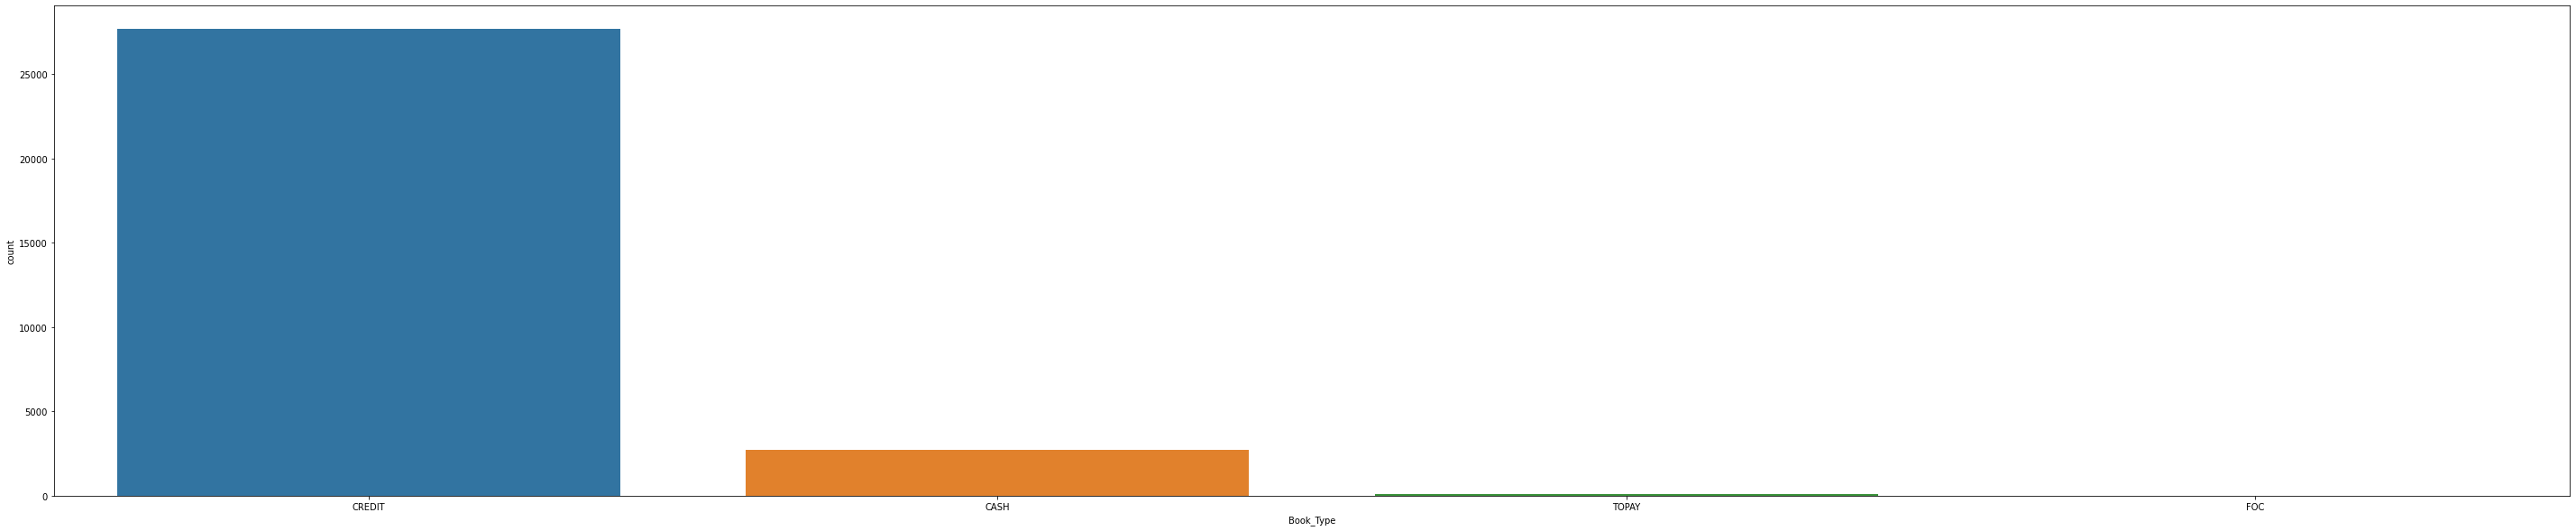

In [183]:
plt.figure(figsize=(50,10))
sns.countplot(x =top_consignor['Book_Type'])
plt.show()

In [184]:
top_consignor['GTOT'].groupby(top_consignor['Book_Type']).sum().sort_values(ascending=False)

Book_Type
CREDIT    6306977.48
CASH       364553.00
TOPAY        5881.00
FOC           423.00
Name: GTOT, dtype: float64

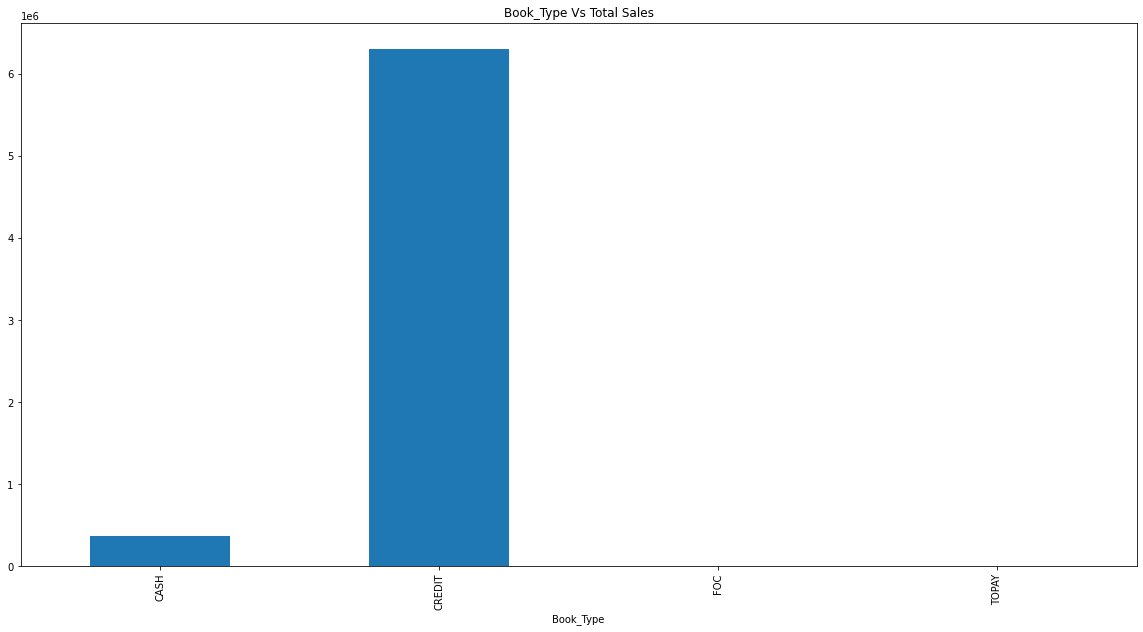

In [185]:
plt.figure(figsize=(20,10))
top_consignor['GTOT'].groupby(top_consignor['Book_Type']).sum().plot(kind = 'bar')
plt.title('Book_Type Vs Total Sales')
plt.show()

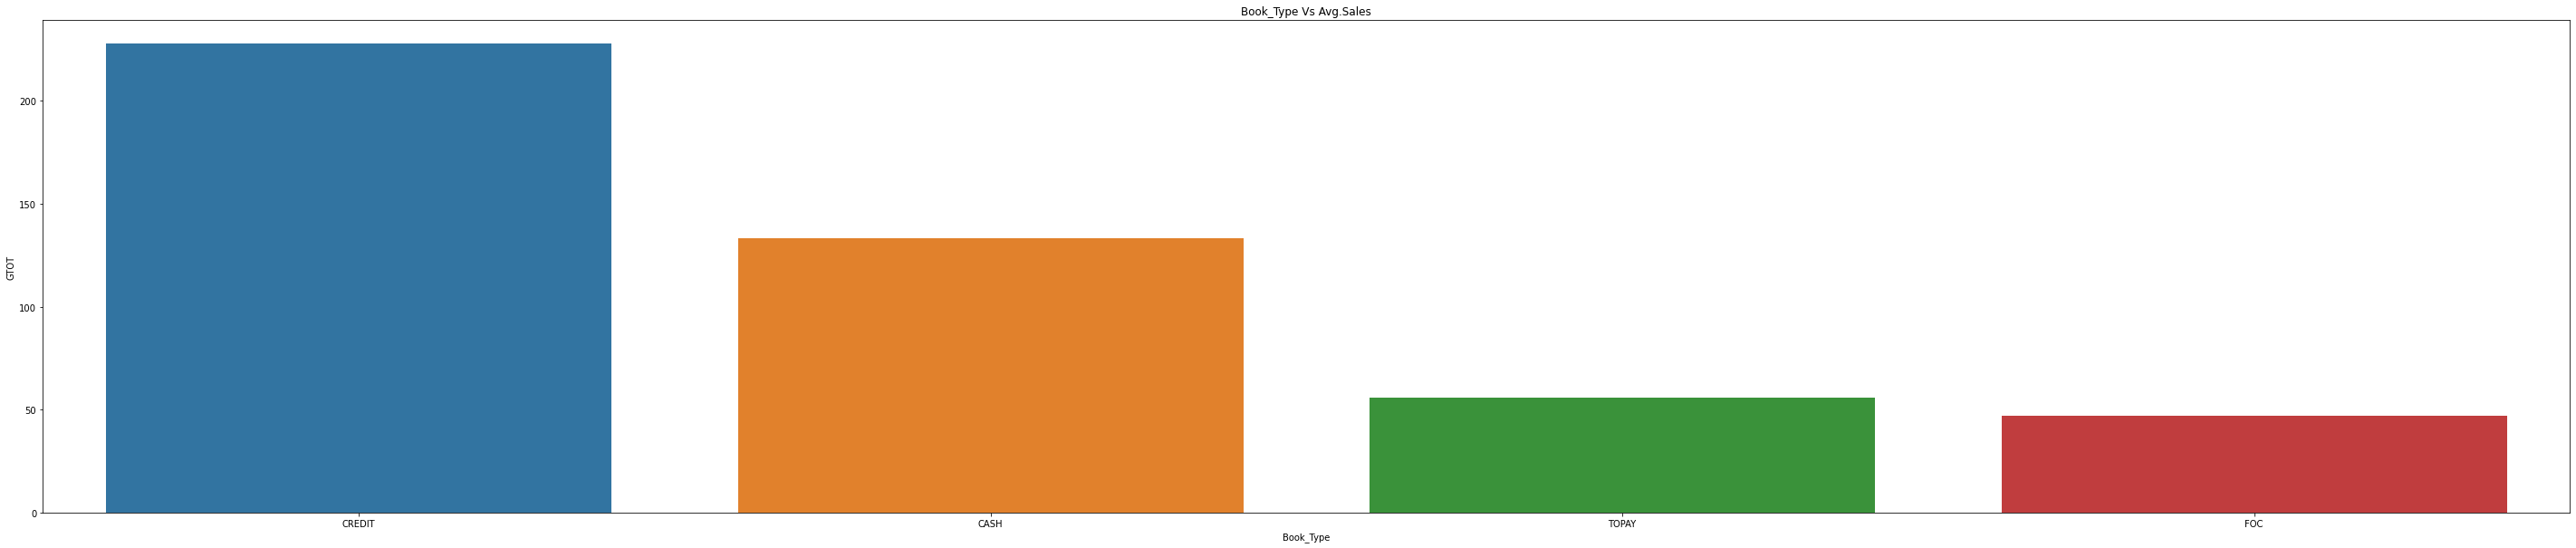

In [186]:
plt.figure(figsize=(50,10))
sns.barplot(x = top_consignor['Book_Type'], y= top_consignor['GTOT'], ci=False)
plt.title('Book_Type Vs Avg.Sales')
plt.show()

In [187]:
top_consignor['GTOT'].groupby(top_consignor['ORG']).count().sort_values(ascending=False)[0:3]

ORG
BLR    10241
MAA     5177
CJB     3815
Name: GTOT, dtype: int64

Text(0, 0.5, 'Count')

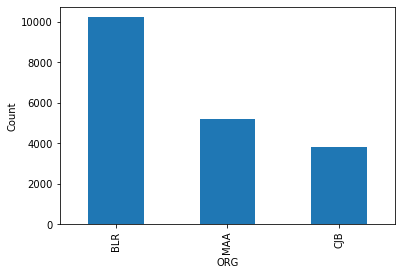

In [188]:
top_consignor['GTOT'].groupby(top_consignor['ORG']).count().sort_values(ascending=False)[0:3].plot(kind='bar')
plt.ylabel('Count')

In [189]:
top_consignor['GTOT'].groupby(top_consignor['ORG']).sum().sort_values(ascending=False)[0:3]

ORG
BLR    1860678.50
MAA    1593131.58
CJB    1429352.00
Name: GTOT, dtype: float64

Text(0, 0.5, 'Total Sales')

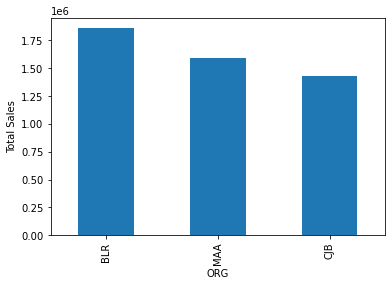

In [190]:
top_consignor['GTOT'].groupby(top_consignor['ORG']).sum().sort_values(ascending=False)[0:3].plot(kind='bar')
plt.ylabel('Total Sales')

In [191]:
top_consignor['GTOT'].groupby(top_consignor['ORG']).mean().sort_values(ascending=False)[0:3]

ORG
HYD    1943.333333
CJB     374.666317
IXM     361.638894
Name: GTOT, dtype: float64

Text(0, 0.5, 'Avg Sales')

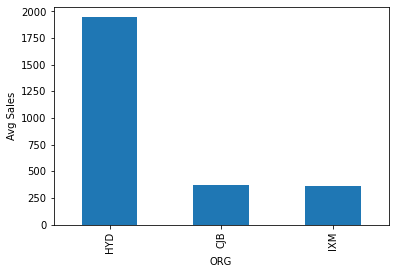

In [192]:
top_consignor['GTOT'].groupby(top_consignor['ORG']).mean().sort_values(ascending=False)[0:3].plot(kind='bar')
plt.ylabel('Avg Sales')

In [193]:
top_consignor['GTOT'].groupby(top_consignor['DEST']).count().sort_values(ascending=False)[0:3]

DEST
MAA    4052
BLR    3083
CJB    2804
Name: GTOT, dtype: int64

Text(0, 0.5, 'Count')

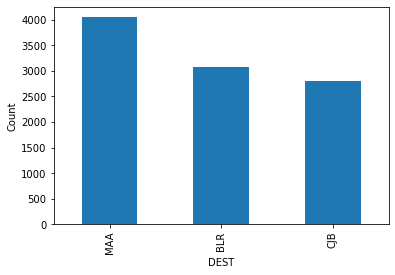

In [194]:
top_consignor['GTOT'].groupby(top_consignor['DEST']).count().sort_values(ascending=False)[0:3].plot(kind='bar')
plt.ylabel('Count')

In [195]:
top_consignor['GTOT'].groupby(top_consignor['DEST']).sum().sort_values(ascending=False)[0:3]

DEST
MAA    1543286.75
CJB    1078252.00
BLR     868539.85
Name: GTOT, dtype: float64

Text(0, 0.5, 'Total Sales')

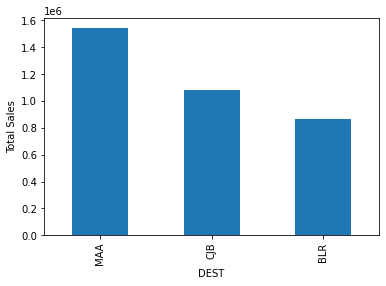

In [196]:
top_consignor['GTOT'].groupby(top_consignor['DEST']).sum().sort_values(ascending=False)[0:3].plot(kind='bar')
plt.ylabel('Total Sales')

In [197]:
top_consignor['GTOT'].groupby(top_consignor['DEST']).mean().sort_values(ascending=False)[0:3]

DEST
VJW    3970.000000
LWP     912.500000
HYD     751.281915
Name: GTOT, dtype: float64

Text(0, 0.5, 'Avg Sales')

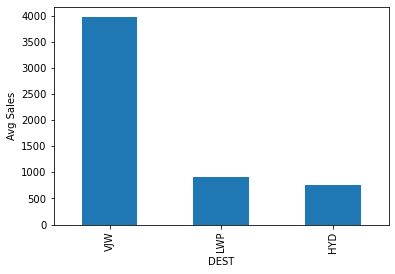

In [198]:
top_consignor['GTOT'].groupby(top_consignor['DEST']).mean().sort_values(ascending=False)[0:3].plot(kind='bar')
plt.ylabel('Avg Sales')

In [199]:
df.head()

,Book_Type,ORG,DEST,Pcs,A.Wgt,C.Wgt,Rate,FRT-AMT,FOD,RISK,LR,COD,DOD,HAND,OTH,GTOT,Consignor,Consignee
0,CREDIT,BLR,CJB,2,27.0,27.0,6.0,162.0,0,0,0,0,0,0,0.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
1,CREDIT,BLR,CJB,10,238.0,238.0,5.0,1190.0,0,0,0,0,0,0,0.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD,SHREE ANJANI COURIER SERVICE PVT. LTD
2,CREDIT,BLR,CJB,28,416.0,416.0,6.0,2496.0,0,0,0,0,0,0,0.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
3,CREDIT,BLR,CJB,3,38.0,38.0,6.0,228.0,0,0,0,0,0,0,0.0,228.0,SHREE NANDAN COURIER LIMITED,SHREE NANDAN COURIER LIMITED
4,CREDIT,BLR,CJB,1,12.0,12.0,9.5,114.0,0,0,0,0,0,0,0.0,114.0,1005-CRITICALOG INDIA PVT LTD,1005-CRITICALOG INDIA PVT LTD


In [200]:
df.drop(['FOD','RISK','LR','COD','DOD','HAND','OTH', 'FRT-AMT', 'A.Wgt', 'Consignee'], axis=1, inplace=True)

In [201]:
df.head()

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Consignor
0,CREDIT,BLR,CJB,2,27.0,6.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
1,CREDIT,BLR,CJB,10,238.0,5.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD
2,CREDIT,BLR,CJB,28,416.0,6.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
3,CREDIT,BLR,CJB,3,38.0,6.0,228.0,SHREE NANDAN COURIER LIMITED
4,CREDIT,BLR,CJB,1,12.0,9.5,114.0,1005-CRITICALOG INDIA PVT LTD


In [202]:
df.describe()

,Pcs,C.Wgt,Rate,GTOT
count,101169.000000,101169.000000,101169.000000,101169.000000
mean,5.807767,70.613785,9.427228,401.524259
std,17.400564,199.604787,20.233263,1001.761598
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,5.000000,50.000000
50%,1.000000,15.000000,6.900000,102.000000
75%,4.000000,50.000000,10.000000,336.000000
max,1500.000000,5555.000000,1700.000000,42250.000000


In [203]:
continuous = ['Pcs', 'C.Wgt', 'Rate']

Pcs:
count    101169.000000
mean          5.807767
std          17.400564
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1500.000000
Name: Pcs, dtype: float64


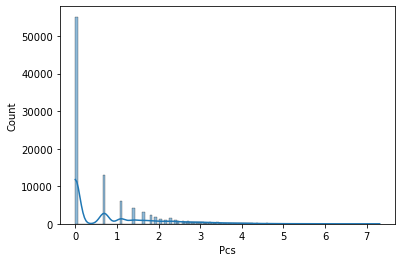

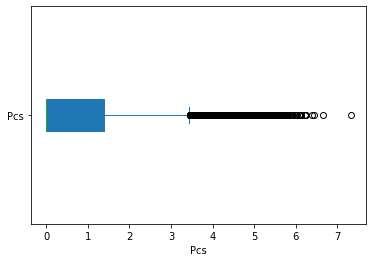

iqr 1.3862943611198906
left_lim -2.0794415416798357
right_lim 3.465735902799726
No. of Outliers 3492
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
C.Wgt:
count    101169.000000
mean         70.613785
std         199.604787
min           0.000000
25%           5.000000
50%          15.000000
75%          50.000000
max        5555.000000
Name: C.Wgt, dtype: float64


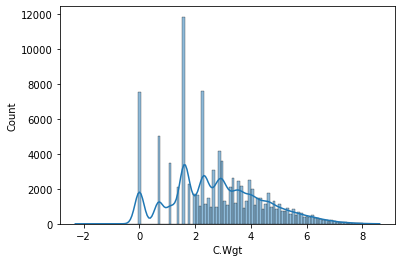

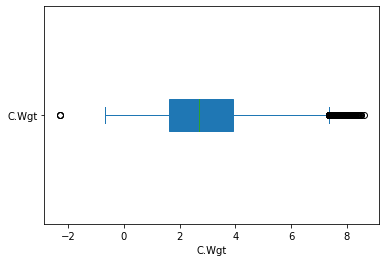

iqr 2.302585092994046
left_lim -1.8444397270569686
right_lim 7.365900644919215
No. of Outliers 348
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
Rate:
count    101169.000000
mean          9.427228
std          20.233263
min           0.000000
25%           5.000000
50%           6.900000
75%          10.000000
max        1700.000000
Name: Rate, dtype: float64


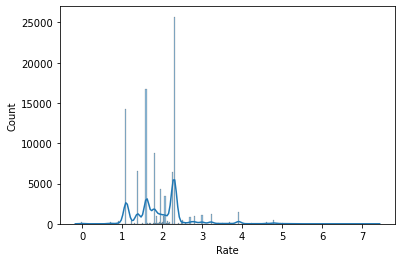

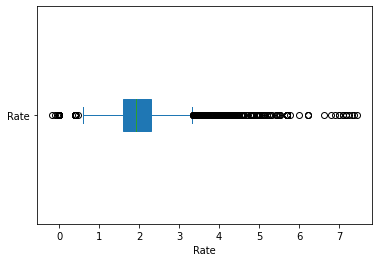

iqr 0.6931471805599456
left_lim 0.5697171415941817
right_lim 3.3423058638339644
No. of Outliers 4277
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


In [204]:
for i in continuous:
    print(i+":")
    print(df[i].describe())
    plt.figure()
    sns.histplot(x = np.log(df[i]), kde=True)
    plt.xlabel(i)
    plt.show()
    plt.figure()
    np.log(df[i]).plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= np.log(df[i]).quantile(0.75)-np.log(df[i]).quantile(0.25)
    right_lim=np.log(df[i]).quantile(0.75)+1.5*iqr
    left_lim=np.log(df[i]).quantile(0.25)-1.5*iqr
    print('iqr', iqr)
    print('left_lim', left_lim)
    print('right_lim', right_lim)
    print('No. of Outliers', len(np.log(df[i])[(np.log(df[i])<left_lim)|(np.log(df[i])>right_lim)]))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'")
    a=a.lower()
    if a=='left':
        lo=int(input('by what number do you want to replace'))
        df[i]=[lo if val<left_lim else val for val in df[i]]
    elif a=='right':
        ro=int(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=int(input('by what number do you want to replace left outliers'))
        ro=int(input('by what number do you want to replace right outliers'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<left_lim else val for val in df[i]]
    elif a=='no':
        pass
    if a=='left' or a=='right' or a=='both':
        plt.figure()
        df[i].plot.box(vert=False,patch_artist=True)
        plt.xlabel(i)
        plt.show()

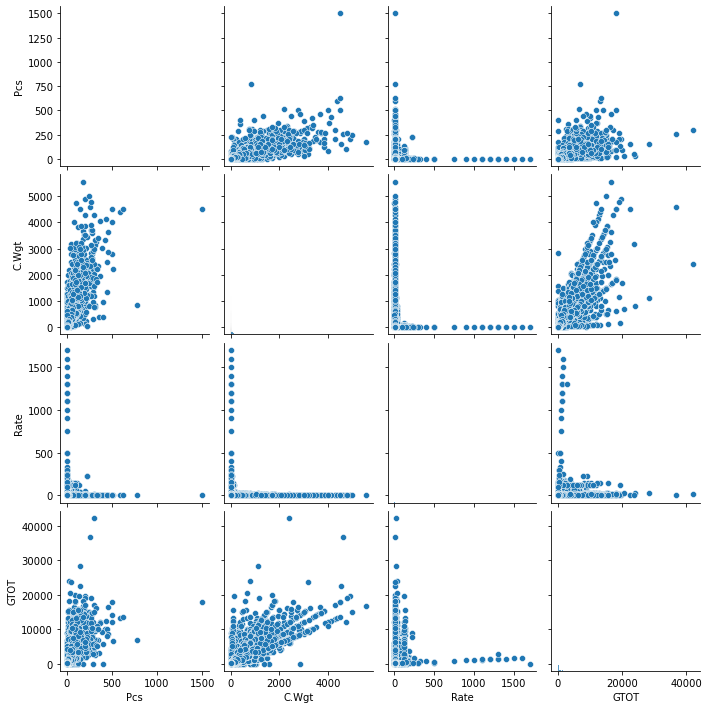

In [205]:
sns.pairplot(data = df, vars=['Pcs','C.Wgt', 'Rate', 'GTOT'])

In [206]:
df.corr()['GTOT']

Pcs      0.713620
C.Wgt    0.844529
Rate     0.034623
GTOT     1.000000
Name: GTOT, dtype: float64

<AxesSubplot:>

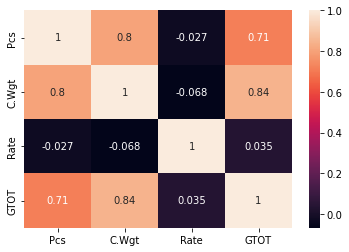

In [207]:
sns.heatmap(df.corr(), annot = True)

In [208]:
df.ORG.value_counts().head(3)

BLR    31539
MAA    20917
CJB    10796
Name: ORG, dtype: int64

In [209]:
df.DEST.value_counts().head(3)

MAA    15298
BLR    15294
CJB    12829
Name: DEST, dtype: int64

In [210]:
df.Consignor.value_counts().head(12)

C1190-GMS WORLDWIDE EXPRESS PVT LTD                   7725
1050-CRITICALOG INDIA PVT LTD                         3254
1005-CRITICALOG INDIA PVT LTD                         3169
VELEX                                                 2842
1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED            2100
PCS EXPRESS LOGISTICS                                 1899
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE    1778
AVIKAM LOGISTICS PRIVATE LIMITED                      1728
TEAM SPEED PARCEL SERVICE                             1647
1010-GMS WORLDWIDE EXPRESS PVT LTD                    1624
MLC COURIER & CARGO                                   1559
BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED         1210
Name: Consignor, dtype: int64

In [211]:
df_rf=df.copy()

In [212]:
top_dest_names = [x for x in df_rf['DEST'].value_counts().head(3).sort_values(ascending = False).index]

In [213]:
top_origin_names = [x for x in df_rf['ORG'].value_counts().head(3).sort_values(ascending = False).index]

In [214]:
top_consignor_names = [x for x in df_rf['Consignor'].value_counts().head(12).sort_values(ascending = False).index]

In [215]:
def one_hot_top_x(df, column, top_x_labels):
    for label in top_x_labels:
        df_rf[column + '_' + label] = np.where(df_rf[column] == label,1,0)

In [216]:
one_hot_top_x(df_rf, 'Consignor', top_consignor_names)

In [217]:
one_hot_top_x(df_rf, 'ORG', top_origin_names)

In [218]:
one_hot_top_x(df_rf, 'DEST', top_dest_names)

In [219]:
df_rf.head()

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Consignor,Consignor_C1190-GMS WORLDWIDE EXPRESS PVT LTD,Consignor_1050-CRITICALOG INDIA PVT LTD,Consignor_1005-CRITICALOG INDIA PVT LTD,Consignor_VELEX,Consignor_1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED,Consignor_PCS EXPRESS LOGISTICS,Consignor_SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE,Consignor_AVIKAM LOGISTICS PRIVATE LIMITED,Consignor_TEAM SPEED PARCEL SERVICE,Consignor_1010-GMS WORLDWIDE EXPRESS PVT LTD,Consignor_MLC COURIER & CARGO,Consignor_BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED,ORG_BLR,ORG_MAA,ORG_CJB,DEST_MAA,DEST_BLR,DEST_CJB
0,CREDIT,BLR,CJB,2,27.0,6.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,CREDIT,BLR,CJB,10,238.0,5.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,CREDIT,BLR,CJB,28,416.0,6.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,CREDIT,BLR,CJB,3,38.0,6.0,228.0,SHREE NANDAN COURIER LIMITED,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,CREDIT,BLR,CJB,1,12.0,9.5,114.0,1005-CRITICALOG INDIA PVT LTD,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [220]:
df_rf_dummies_book = pd.get_dummies(df_rf.Book_Type, drop_first=True, prefix='Book_Type')

In [221]:
df_rf = pd.concat([df_rf,df_rf_dummies_book], axis=1)

In [222]:
df_rf.drop(['Book_Type','ORG','DEST','Consignor'],axis=1, inplace=True)

In [223]:
df_rf.columns

Index(['Pcs', 'C.Wgt', 'Rate', 'GTOT',
       'Consignor_C1190-GMS WORLDWIDE EXPRESS PVT LTD',
       'Consignor_1050-CRITICALOG INDIA PVT LTD',
       'Consignor_1005-CRITICALOG INDIA PVT LTD', 'Consignor_VELEX',
       'Consignor_1054-GMS WORLDWIDE EXPRESS PRIVATE LIMITED',
       'Consignor_PCS EXPRESS LOGISTICS',
       'Consignor_SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE',
       'Consignor_AVIKAM LOGISTICS PRIVATE LIMITED',
       'Consignor_TEAM SPEED PARCEL SERVICE',
       'Consignor_1010-GMS WORLDWIDE EXPRESS PVT LTD',
       'Consignor_MLC COURIER & CARGO',
       'Consignor_BLUEWINGS CARGO AND LOGISTICS PRIVATE LIMITED', 'ORG_BLR',
       'ORG_MAA', 'ORG_CJB', 'DEST_MAA', 'DEST_BLR', 'DEST_CJB',
       'Book_Type_CREDIT', 'Book_Type_FOC', 'Book_Type_TOPAY'],
      dtype='object')

In [224]:
x_rf = df_rf.iloc[:,df_rf.columns != 'GTOT']

In [225]:
y_rf = df_rf.iloc[:,df_rf.columns == 'GTOT']

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf,y_rf, test_size=0.3, random_state=123)

In [228]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=123)

In [229]:
from sklearn.model_selection import RandomizedSearchCV

In [230]:
params = {'max_depth': [4,6,8,9,10,11,12,13,14], 'min_samples_split': [2,3,4],'max_features':['auto']}

In [231]:
rgr = RandomizedSearchCV(rfr, params, n_iter=10, cv=5)

In [232]:
model1 = rgr.fit(x_rf,y_rf)

In [233]:
model1.best_params_

{'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 13}

In [234]:
model1.best_score_

0.9759018221531394

In [235]:
model1.score(x_rf,y_rf)

0.9945781196035868

In [237]:
rfr = RandomForestRegressor(n_estimators=100,n_jobs=-1, min_samples_split=2, max_features='auto',max_depth=13, oob_score=True, random_state=123)

In [238]:
model1 = rfr.fit(x_train_rf,y_train_rf)

In [239]:
y_pred_te_rf = model1.predict(x_test_rf)

In [240]:
model1.score(x_test_rf,y_test_rf)

0.9541137878889301

In [241]:
mean_squared_error(y_test_rf,y_pred_te_rf)

45575.953378536266

In [242]:
model1.feature_importances_

array([2.45326903e-02, 7.71926080e-01, 1.98992337e-01, 3.86547436e-05,
       1.44954156e-05, 1.93025997e-06, 1.34321471e-05, 8.32893306e-07,
       3.02029802e-07, 8.25207655e-08, 7.80094059e-05, 3.87244261e-05,
       3.13143108e-06, 7.49748666e-08, 6.13335205e-07, 3.64605037e-04,
       2.91066182e-04, 7.19279657e-04, 4.14650070e-04, 4.89760304e-04,
       2.30184877e-04, 1.13922207e-03, 3.10822121e-04, 3.99018450e-04])

In [243]:
model1.oob_score_

0.9815765135298429

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

In [245]:
gb= GradientBoostingRegressor(random_state=123)

from sklearn.model_selection import RandomizedSearchCV 

params={'n_estimators': range(1,200)} 

rgr=RandomizedSearchCV(gb, params, cv=5, n_iter = 10)

model2 = rgr.fit(x_rf,y_rf)

model2.best_estimator_

GradientBoostingRegressor(n_estimators=174, random_state=123)

In [246]:
model2.best_score_

0.9804719350417391

In [247]:
gb = GradientBoostingRegressor(n_estimators=174,random_state=123)

In [248]:
model2 = gb.fit(x_train_rf,y_train_rf)

In [249]:
y_pred_te = model2.predict(x_test_rf)

In [250]:
model2.score(x_test_rf,y_test_rf)

0.9689677822601249

In [251]:
mean_squared_error(y_test_rf,y_pred_te)

30822.394001965018

In [252]:
# We will apply Linear Regression

In [253]:
continuous = df[['Pcs', 'C.Wgt', 'Rate']]

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data['features'] = continuous.columns

vif_data['VIF'] = [variance_inflation_factor(continuous.values, i) for i in range(len(continuous.columns))]

vif_data

,features,VIF
0,Pcs,3.119693
1,C.Wgt,3.102858
2,Rate,1.012583


In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
# Column Transformation

In [257]:
from sklearn.compose import ColumnTransformer

In [258]:
transformer = ColumnTransformer(transformers=[('tnf1', StandardScaler(),['Pcs','C.Wgt','Rate'])], remainder='passthrough')

In [259]:
x_train = transformer.fit_transform(x_train_rf)

In [260]:
y_train = y_train_rf.copy()

In [261]:
x_test = transformer.transform(x_test_rf)

In [262]:
y_test = y_test_rf.copy()

In [263]:
from sklearn.linear_model import SGDRegressor

In [264]:
SGDrgr = SGDRegressor(early_stopping=True, validation_fraction=0.3, random_state=123)

In [265]:
model3 = SGDrgr.fit(x_train,y_train)

In [266]:
y_pred_te = model3.predict(x_test)

In [267]:
model3.score(x_test,y_test)

0.7191645198721037

In [268]:
from sklearn.metrics import r2_score

In [269]:
r2_score(y_test,y_pred_te)

0.7191645198721037

In [270]:
mean_squared_error(y_test,y_pred_te)

278936.61648005265

In [271]:
len(x_test)

30351

# Assumptions

##  1.Residuals are normally distributed

In [272]:
resid = y_test.squeeze()-y_pred_te

In [273]:
resid

19516    -97.049950
32553   -171.541538
28189   -199.643563
34267     80.444461
11199      4.399465
            ...    
82698    -58.169948
85446     16.421231
72956    -30.134515
41983   -146.514645
44831      7.980115
Name: GTOT, Length: 30351, dtype: float64

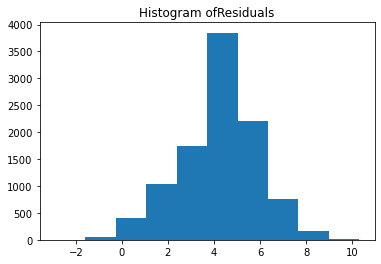

In [274]:
plt.hist(np.log(resid))
plt.title('Histogram ofResiduals')
plt.show()

## 2.Residuals are independent

In [275]:
x1= np.arange(0,30351)

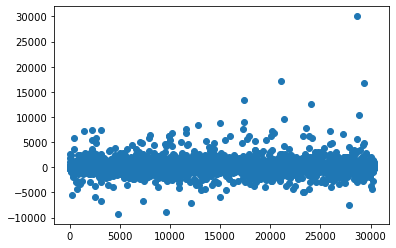

In [276]:
plt.scatter(x1, resid)

## 3.Presence of homoscedasticity

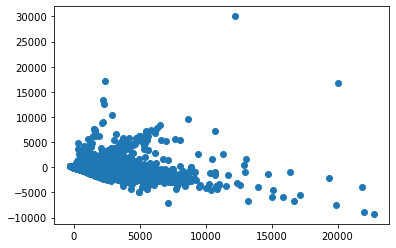

In [277]:
plt.scatter(y_pred_te,resid)

In [278]:
# Homoscedasticity is not present, It is heteroscedastic ALERT

## 4.Model is not very linear has been established earlier with pairplot

## Presence of Auto-Corelation

In [279]:
from statsmodels.stats.stattools import durbin_watson

In [280]:
durbin_watson(resid)

1.99603771289932

In [281]:
# There is no auto-Correlation

In [283]:
# Lets to cluster the Consignors

In [284]:
df_km = df.copy()

In [285]:
df_km.head()

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Consignor
0,CREDIT,BLR,CJB,2,27.0,6.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
1,CREDIT,BLR,CJB,10,238.0,5.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD
2,CREDIT,BLR,CJB,28,416.0,6.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED
3,CREDIT,BLR,CJB,3,38.0,6.0,228.0,SHREE NANDAN COURIER LIMITED
4,CREDIT,BLR,CJB,1,12.0,9.5,114.0,1005-CRITICALOG INDIA PVT LTD


In [286]:
df_km = df_km.set_index('Consignor')

In [287]:
df_km

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT
Consignor,,,,,,,
SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,CREDIT,BLR,CJB,2,27.0,6.0,162.0
SHREE ANJANI COURIER SERVICE PVT. LTD,CREDIT,BLR,CJB,10,238.0,5.0,1190.0
SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,CREDIT,BLR,CJB,28,416.0,6.0,2496.0
SHREE NANDAN COURIER LIMITED,CREDIT,BLR,CJB,3,38.0,6.0,228.0
1005-CRITICALOG INDIA PVT LTD,CREDIT,BLR,CJB,1,12.0,9.5,114.0
...,...,...,...,...,...,...,...
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE,CREDIT,VLR,MAA,1,5.0,6.0,30.0
RELAY EXPREES,TOPAY,VLR,MAA,2,22.0,10.0,220.0
SREE GOKULAM SPEED & SAFE COURIER SERVICES PRIVATE,CREDIT,VLR,MAA,1,5.0,6.0,30.0


In [288]:
df_km_dummies = pd.get_dummies(df_km[['Book_Type','ORG','DEST']], drop_first=True)

In [289]:
df_km = pd.concat([df_km,df_km_dummies], axis=1)

In [290]:
df_km.drop(['Book_Type', 'ORG', 'DEST'], axis=1, inplace=True)

In [291]:
# Column Transformation

In [292]:
from sklearn.compose import ColumnTransformer

In [293]:
transformer = ColumnTransformer(transformers=[('tnf1', StandardScaler(),['Pcs','C.Wgt','Rate'])], remainder='passthrough')

In [294]:
df_km_scaled = transformer.fit_transform(df_km)

In [295]:
from sklearn.cluster import KMeans

In [296]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    model = kmeans.fit(df_km_scaled)
    wcss.append(model.inertia_)

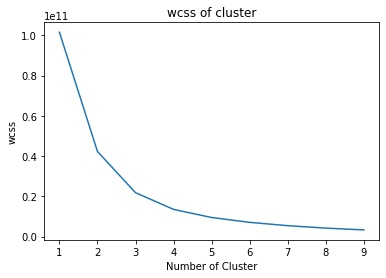

In [297]:
plt.plot(range(1,10),wcss)
plt.title('wcss of cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [298]:
# number of cluster= 4

In [299]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [300]:
clusters = kmeans.fit_predict(df_km_scaled)

In [301]:
clusters

array([0, 3, 3, ..., 0, 0, 0])

In [302]:
df_km['cluster'] = clusters

<AxesSubplot:xlabel='Pcs', ylabel='GTOT'>

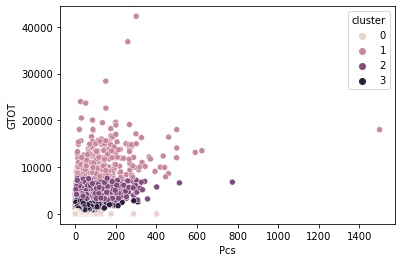

In [303]:
sns.scatterplot(df_km.Pcs, df_km.GTOT, hue=df_km.cluster)

In [304]:
df_exp=df.copy()

In [305]:
df_exp['Cluster'] = clusters

<AxesSubplot:xlabel='Pcs', ylabel='GTOT'>

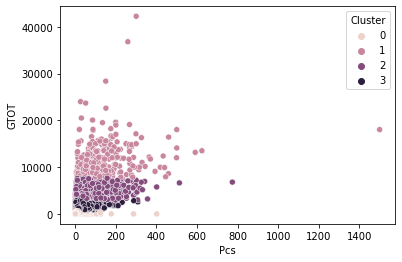

In [306]:
sns.scatterplot(df_exp.Pcs, df_exp.GTOT, hue=df_exp.Cluster)

In [307]:
# Lowest Contribution to GTOT

In [308]:
df_exp.Consignor[df_exp.Cluster == 0].unique()

array(['SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED',
       'SHREE NANDAN COURIER LIMITED', '1005-CRITICALOG INDIA PVT LTD',
       ..., 'REALY', 'POOMAGAL AGENCIES', 'teamex'], dtype=object)

In [309]:
len(df_exp.Consignor[df_exp.Cluster == 0].unique())

3223

In [310]:
# 2nd Lowest Contribution to GTOT

In [311]:
df_exp.Consignor[df_exp.Cluster == 3].unique()

array(['SHREE ANJANI COURIER SERVICE PVT. LTD',
       'SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED',
       'SM EXPRESS LOGISTICS PRIVATE LIMITED', ..., 'VALSPUN', 'SAHILLOG',
       'SKY TECH LOGISTICS'], dtype=object)

In [312]:
len(df_exp.Consignor[df_exp.Cluster == 3].unique())

1342

In [313]:
# 2nd Highest Contribution to GTOT

In [314]:
df_exp.Consignor[df_exp.Cluster == 2].unique()

array(['C1113-CRITICALOG INDIA PVT LTD', 'END 2 END CARGO MOVERS',
       'RS TEMPO TRANSPORTS', 'SRI VV INDUSTRIES', 'SIBI POLYMERS',
       'MEHAK DATA SYSTEMS', 'P.E. INDUSTRIES', 'sa engineerin',
       'SANTHOSH', 'KAMATCHI POLYMER(RAVI METTU)', 'MERIT',
       'C1190-GMS WORLDWIDE EXPRESS PVT LTD', 'BHARATH SURGICALS',
       'GOPINATH.B', 'SOUTH INDIA',
       'ITAL PLASTIC COMPOUNDS PRIVATE LIMITED',
       'ANANDA STEEL(RAVI METTU)', 'SA PHARMA', 'POBC', 'ESWAR CARGO',
       'ZYF TEX PRIVATE LIMITED', 'END TO END CARGO MOVERS LLP',
       'SKYLIGHT EXPRESS PRIVATE LIMITED', 'INDEXXCO', 'R.LOGANATHAN',
       'GLS', 'UNIQUE 5PL SERVICES INDIA PRIVATE LIMITED', 'R.K.INTERIOR',
       'THE SALEM&CO OPERATIVE', '1010-GMS WORLDWIDE EXPRESS PVT LTD',
       'Radiant X-Ways Logistic Private Limited', 'DR TECH',
       'METRO SWIFT PRIVATE LIMITED', 'NEXUSONE EXPRESS PRIVATE LIMITED.',
       'SPW', 'BLOW CAN (RAVI METTU)',
       'SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED', 'Y

In [315]:
len(df_exp.Consignor[df_exp.Cluster == 2].unique())

422

In [316]:
# Highest Contribution to GTOT

df_exp.Consignor[df_exp.Cluster == 1].unique()

array(['END TO END CARGO MOVERS LLP', 'JAYDEEP', 'BALAJI ELECTRONICS',
       'C1190-GMS WORLDWIDE EXPRESS PVT LTD', 'MEHAK DATA SYSTEMS',
       'nilesh', 'SF LOGISTICS', 'SKY LINE ENTERPRISES',
       'C1115-CRITICALOG INDIA PVT LTD',
       'VEE TECHNOLOGIES PRIVATE LIMITED', 'sa engineerin',
       'BHARATH SURGICALS', 'P.E. INDUSTRIES', 'PREMIER ENTERPRISES',
       'SATELITE', 'MADURAI ENTERPRISES', 'ZYF TEX PRIVATE LIMITED',
       'UNIQUE 5PL SERVICES INDIA PRIVATE LIMITED', 'VIJAY CHEMSOL(ANBU)',
       'V .PURE WATER TECH', 'AVIKAM LOGISTICS PRIVATE LIMITED',
       'BHOOMI LOGISTICS', 'END 2 END CARGO MOVERS', 'YME',
       'SRIDHARAN TEXTILES', 'NT ENTERPRISES', 'A V ENTERPRISES',
       'END 2 END CARGO MOVERS.', 'SA ENGINEERING',
       'INNOVATIVE RETAIL CONSEPT PVT LTD', 'D EXP', 'BALAJI',
       '1010-GMS WORLDWIDE EXPRESS PVT LTD', 'SKYLINE ENTERPRISES',
       '1050-CRITICALOG INDIA PVT LTD', 'RUCHI PACKAGING(RAVI )',
       'SIBI POLYMERS', 'MAA-GMS-FTL',
       'IT

In [317]:
len(df_exp.Consignor[df_exp.Cluster == 1].unique())

106

In [318]:
# Overall Silhoutte Score

In [319]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [320]:
silhouette_score(df_km_scaled,clusters)

0.8084853345470765

In [321]:
from yellowbrick.cluster import SilhouetteVisualizer

In [322]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

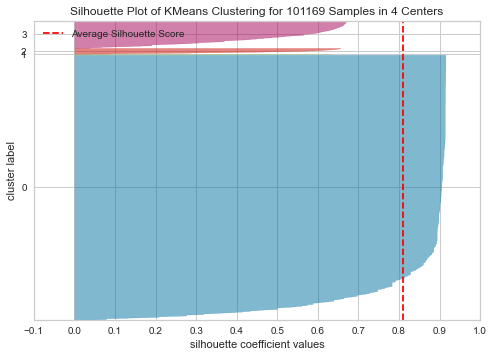

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 101169 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [323]:
visualizer.fit(df_km_scaled)
visualizer.show()

In [324]:
num_cluster = 4
sample_silhouette_values = silhouette_samples(df_km_scaled,clusters)

In [325]:
sample_silhouette_values

array([0.89883566, 0.55689572, 0.45052059, ..., 0.90637575, 0.90637481,
       0.90255945])

In [326]:
# Profiling of Clusters

In [327]:
df_exp.GTOT.groupby(df_exp.Cluster).describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,89715.0,161.776699,178.021792,0.0,48.0,95.0,210.0,826.8
1,349.0,11284.881146,3780.875158,7830.0,8900.0,10104.0,12600.0,42250.0
2,1944.0,4371.325880,1234.410104,2935.0,3350.0,4000.0,5103.9,7805.0
3,9161.0,1492.384034,544.307194,828.0,1030.0,1350.0,1820.0,2930.0


<AxesSubplot:xlabel='Cluster', ylabel='GTOT'>

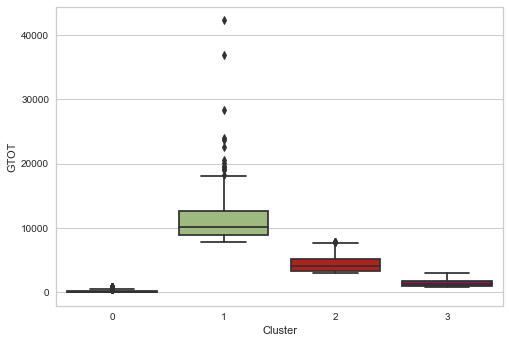

In [328]:
sns.boxplot(x=df_exp.Cluster, y=df_exp.GTOT)

In [329]:
df_exp.head()

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Consignor,Cluster
0,CREDIT,BLR,CJB,2,27.0,6.0,162.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,0
1,CREDIT,BLR,CJB,10,238.0,5.0,1190.0,SHREE ANJANI COURIER SERVICE PVT. LTD,3
2,CREDIT,BLR,CJB,28,416.0,6.0,2496.0,SHREE TIRUPATI COURIER SERVICES PRIVATE LIMITED,3
3,CREDIT,BLR,CJB,3,38.0,6.0,228.0,SHREE NANDAN COURIER LIMITED,0
4,CREDIT,BLR,CJB,1,12.0,9.5,114.0,1005-CRITICALOG INDIA PVT LTD,0


In [330]:
del df_exp['Consignor']

In [331]:
top_dest_names = [x for x in df_exp['DEST'].value_counts().head(3).sort_values(ascending = False).index]

In [332]:
top_origin_names = [x for x in df_exp['ORG'].value_counts().head(3).sort_values(ascending = False).index]

In [333]:
def one_hot_top_x(df, column, top_x_labels):
    for label in top_x_labels:
        df[column + '_' + label] = np.where(df[column] == label,1,0)

In [334]:
one_hot_top_x(df_exp, 'ORG', top_origin_names)

In [335]:
one_hot_top_x(df_exp, 'DEST', top_dest_names)

In [336]:
df_exp

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Cluster,ORG_BLR,ORG_MAA,ORG_CJB,DEST_MAA,DEST_BLR,DEST_CJB
0,CREDIT,BLR,CJB,2,27.0,6.0,162.0,0,1,0,0,0,0,1
1,CREDIT,BLR,CJB,10,238.0,5.0,1190.0,3,1,0,0,0,0,1
2,CREDIT,BLR,CJB,28,416.0,6.0,2496.0,3,1,0,0,0,0,1
3,CREDIT,BLR,CJB,3,38.0,6.0,228.0,0,1,0,0,0,0,1
4,CREDIT,BLR,CJB,1,12.0,9.5,114.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101165,CREDIT,VLR,MAA,1,5.0,6.0,30.0,0,0,0,0,1,0,0
101166,TOPAY,VLR,MAA,2,22.0,10.0,220.0,0,0,0,0,1,0,0
101167,CREDIT,VLR,MAA,1,5.0,6.0,30.0,0,0,0,0,1,0,0
101168,CREDIT,VPM,MAA,1,5.0,6.0,30.0,0,0,0,0,1,0,0


In [337]:
df_exp_dummies = pd.get_dummies(df_exp[['Book_Type', 'Cluster']], drop_first=True)

In [338]:
df_exp = pd.concat([df_exp,df_exp_dummies], axis=1)

In [339]:
df_exp.head()

,Book_Type,ORG,DEST,Pcs,C.Wgt,Rate,GTOT,Cluster,ORG_BLR,ORG_MAA,ORG_CJB,DEST_MAA,DEST_BLR,DEST_CJB,Cluster,Book_Type_CREDIT,Book_Type_FOC,Book_Type_TOPAY
0,CREDIT,BLR,CJB,2,27.0,6.0,162.0,0,1,0,0,0,0,1,0,1,0,0
1,CREDIT,BLR,CJB,10,238.0,5.0,1190.0,3,1,0,0,0,0,1,3,1,0,0
2,CREDIT,BLR,CJB,28,416.0,6.0,2496.0,3,1,0,0,0,0,1,3,1,0,0
3,CREDIT,BLR,CJB,3,38.0,6.0,228.0,0,1,0,0,0,0,1,0,1,0,0
4,CREDIT,BLR,CJB,1,12.0,9.5,114.0,0,1,0,0,0,0,1,0,1,0,0


In [340]:
df_exp.drop(['Book_Type','ORG','DEST','Cluster'], axis=1, inplace=True)

In [341]:
x_exp = df_exp.iloc[:,df_exp.columns != 'GTOT']

In [342]:
y_exp = df_exp.iloc[:,df_exp.columns == 'GTOT']

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(x_exp,y_exp, test_size=0.3, random_state=123)

In [345]:
# Column Transformation

In [346]:
from sklearn.compose import ColumnTransformer

In [347]:
transformer = ColumnTransformer(transformers=[('tnf1', StandardScaler(),['Pcs','C.Wgt','Rate'])], remainder='passthrough')

In [348]:
x_train = transformer.fit_transform(x_train_exp)

In [349]:
y_train = y_train_exp.copy()

In [350]:
x_test = transformer.transform(x_test_exp)

In [351]:
y_test = y_test_exp.copy()

In [352]:
from sklearn.linear_model import SGDRegressor

In [353]:
SGDrgr = SGDRegressor(early_stopping=True, validation_fraction=0.3, random_state=123)

In [354]:
model5 = SGDrgr.fit(x_train,y_train)

In [355]:
y_pred_te = model5.predict(x_test)

In [356]:
model5.score(x_test,y_test)

0.7064213476835665

In [357]:
from sklearn.metrics import r2_score

In [358]:
r2_score(y_test,y_pred_te)

0.7064213476835665

In [359]:
mean_squared_error(y_test,y_pred_te)

291593.6259571833

In [360]:
len(x_test)

30351

# Assumptions

##  1.Residuals are normally distributed

In [361]:
resid = y_test.squeeze()-y_pred_te

In [362]:
resid

19516   -113.892908
32553   -100.792270
28189   -128.229016
34267    105.454560
11199     -8.767687
            ...    
82698    -62.383476
85446     87.293135
72956   -100.777171
41983    -90.399528
44831    -11.614027
Name: GTOT, Length: 30351, dtype: float64

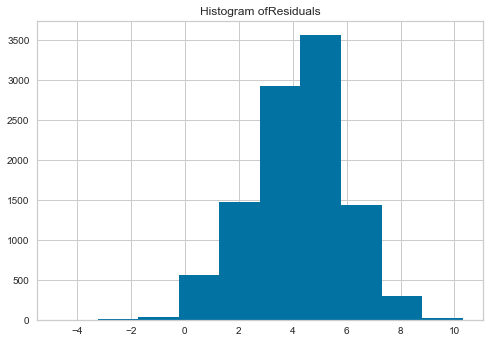

In [363]:
plt.hist(np.log(resid))
plt.title('Histogram ofResiduals')
plt.show()

## 2.Residuals are independent

In [364]:
x1= np.arange(0,30351)

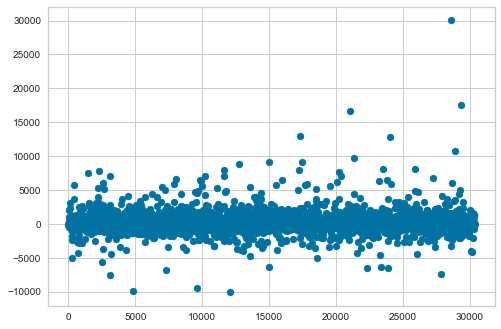

In [365]:
plt.scatter(x1, resid)

## 3.Presence of homoscedasticity

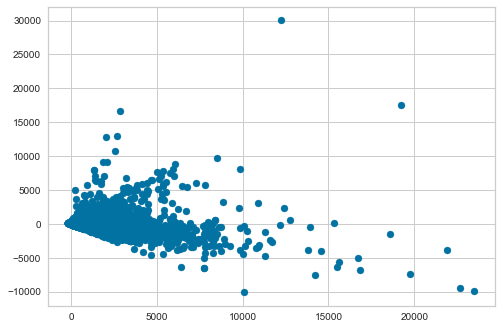

In [366]:
plt.scatter(y_pred_te,resid)

In [367]:
# Homoscedasticity is not present, It is heteroscedastic ALERT

## 4.Model is not very linear has been established earlier with pairplot

## Presence of Auto-Corelation

In [368]:
from statsmodels.stats.stattools import durbin_watson

In [369]:
durbin_watson(resid)

1.9992952218265323

In [370]:
# There is no auto-Correlation

In [371]:
df_exp.sample(5)

,Pcs,C.Wgt,Rate,GTOT,ORG_BLR,ORG_MAA,ORG_CJB,DEST_MAA,DEST_BLR,DEST_CJB,Book_Type_CREDIT,Book_Type_FOC,Book_Type_TOPAY
20612,41,555.0,5.0,2775.0,1,0,0,1,0,0,1,0,0
98425,5,71.0,5.0,355.0,1,0,0,0,0,0,1,0,0
65952,1,34.0,10.0,340.0,1,0,0,0,0,0,0,0,0
37225,18,198.0,3.0,594.0,0,0,1,0,0,0,1,0,0
75635,1,3.0,3.0,9.0,0,0,0,0,0,0,1,0,0


In [372]:
from sklearn.preprocessing import PowerTransformer

In [373]:
pt= PowerTransformer(method='yeo-johnson')

In [374]:
# Column Transformation

In [375]:
from sklearn.compose import ColumnTransformer

In [376]:
transformer2 = ColumnTransformer(transformers=[('tnf2', PowerTransformer(method='yeo-johnson'),['Pcs','C.Wgt','Rate'])], remainder='passthrough')

In [377]:
x_exp1 = df_exp.iloc[:,df_exp.columns != 'GTOT']

y_exp1 = df_exp.iloc[:,df_exp.columns == 'GTOT']

from sklearn.model_selection import train_test_split

x_train_exp1, x_test_exp1, y_train_exp1, y_test_exp1 = train_test_split(x_exp1,y_exp1, test_size=0.3, random_state=123)

In [378]:
x_train = transformer.fit_transform(x_train_exp1)

In [379]:
y_train = y_train_exp1.copy()

In [380]:
x_test = transformer.transform(x_test_exp1)

In [381]:
y_test = y_test_exp1.copy()

In [382]:
from sklearn.linear_model import SGDRegressor

In [383]:
SGDrgr = SGDRegressor(early_stopping=True, validation_fraction=0.3, random_state=123)

In [384]:
model6 = SGDrgr.fit(x_train,y_train)

In [385]:
y_pred_te = model6.predict(x_test)

In [386]:
model6.score(x_test,y_test)

0.7064213476835665

In [387]:
from sklearn.metrics import r2_score

In [388]:
r2_score(y_test,y_pred_te)

0.7064213476835665

In [389]:
mean_squared_error(y_test,y_pred_te)

291593.6259571833